In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri, vectors, numpy2ri

from rich.console import Console
from rich.table import Table

import DataExtractor
import datetime

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, acorr_ljungbox

from scipy.stats import kurtosis, shapiro, kstest, norm, nct, genlogistic
from scipy.stats import fit
from scipy.optimize import differential_evolution

import warnings
warnings.filterwarnings('ignore')

from arch import arch_model

from scipy.stats import ttest_1samp

In [2]:
NP_RANDOM_SEED = 1234567890

In [3]:
r : robjects.R = robjects.r
r['source']('./R/R_Imports.R')

pandas2ri.activate()

R[write to console]: trying URL 'https://cran.mirror.garr.it/CRAN/src/contrib/strucchange_1.5-3.tar.gz'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 517682 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000/miniconda3/envs/mpsmf_env/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -fdebug-prefix-map=/workspace/croot/r-base_1695428141831/work=/usr/local/src/conda/r-base-4.3.1 -fdebug-prefix-map=/home/edoman000/miniconda3/envs/mpsmf_env=/usr/local/src/conda-prefix  -c strucchange_functions.c -o strucchange_functions.o
x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000

installing to /home/edoman000/miniconda3/envs/mpsmf_env/lib/R/library/00LOCK-strucchange/00new/strucchange/libs
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (strucchange)
R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/RtmpKuhfBE/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Updating HTML index of packages in '.Library'

R[write to console]: Making 'packages.html' ...
R[write to console]:  done

R[write to console]: trying URL 'https://cran.mir

x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000/miniconda3/envs/mpsmf_env/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -fdebug-prefix-map=/workspace/croot/r-base_1695428141831/work=/usr/local/src/conda/r-base-4.3.1 -fdebug-prefix-map=/home/edoman000/miniconda3/envs/mpsmf_env=/usr/local/src/conda-prefix  -c arma.c -o arma.o
x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000/miniconda3/envs/mpsmf_env/lib    

dsumsl.f:1004:72:

 1004 |  10      W(I) = A*X(I) + Y(I)
      |                                                                        1
dsumsl.f:1123:72:

 1123 |  10      Y(I) = S
      |                                                                        1
dsumsl.f:1137:72:

 1137 |  10      X(I) = Y(I) / Z(I)
      |                                                                        1
dsumsl.f:1141:72:

 1141 |  30      X(I) = Y(I) * Z(I)
      |                                                                        1
dsumsl.f:1224:72:

 1224 |  30      Z(I) = CY * Z(I)  -  CS * W(I)
      |                                                                        1
dsumsl.f:1908:72:

 1908 |  10      STEP(I) = G(I) / GNORM
      |                                                                        1
dsumsl.f:1923:72:

 1923 |  20           STEP(I) = -NWTSTP(I)
      |                                                                        1
dsumsl.f:1941:72:

 1941 |  40   

x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000/miniconda3/envs/mpsmf_env/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -fdebug-prefix-map=/workspace/croot/r-base_1695428141831/work=/usr/local/src/conda/r-base-4.3.1 -fdebug-prefix-map=/home/edoman000/miniconda3/envs/mpsmf_env=/usr/local/src/conda-prefix  -c formats.c -o formats.o
x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000/miniconda3/envs/mpsmf_env/l

installing to /home/edoman000/miniconda3/envs/mpsmf_env/lib/R/library/00LOCK-tseries/00new/tseries/libs
** R
** data
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (tseries)
R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/RtmpKuhfBE/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Updating HTML index of packages in '.Library'

R[write to console]: Making 'packages.html' ...
R[write to console]:  done

R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following 

In [4]:
def buildTable(testName : str, headerList : list[str], justifyList: list[str]) -> Table :
    table = Table(title = testName)
    for i in range(0, len(headerList)) :
        table.add_column(headerList[i], justify = justifyList[i])
    return table

def kpss_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : list, testTarget : str = "") :
    SIGNIFICANCE_LEVEL = 0.05

    kpssTable : Table = buildTable("KPSS" + " " + testTarget, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        kpssStat, pValue, _, _ = kpss(dataFrameDict[crypto][colName]) ;
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        kpssTable.add_row(crypto, str(kpssStat), str(pValue), outcomeString)
    console = Console()
    console.print(kpssTable)

def adf_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : list, testTarget : str = "") :
    SIGNIFICANCE_LEVEL = 0.05

    adfullerTable = buildTable("ADF" + " " + testTarget, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        result = adfuller(dataFrameDict[crypto][colName]) ;
        adfullerStat : float = result[0]
        pValue = result[1]
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        adfullerTable.add_row(crypto, str(adfullerStat), str(pValue), outcomeString)
    console = Console()
    console.print(adfullerTable)

def breusch_pagan_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, testTarget : str = "", printSummary : bool = False) :
    SIGNIFICANCE_LEVEL = 0.05
    console = Console()
    bpTable = buildTable("Breusch-Pagan", ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        x = sm.add_constant(dataFrameDict[crypto][colName].index.tolist())
        model = sm.OLS(dataFrameDict[crypto][colName].values, x)
        fittedModel = model.fit()
        if printSummary : 
            console.print(crypto + "\n" + str(fittedModel.summary()))
        
        residKurtosis = kurtosis(fittedModel.resid)

        # In the general description of LM test, Greene mentions that this test exaggerates the significance of results in small or moderately large samples. 
        # In this case the F-statistic is preferable.

        # BREUSCH-PAGAN TEST
        _, _, fValue, f_pvalue = het_breuschpagan(fittedModel.resid, fittedModel.model.exog, residKurtosis > 0.05)
        statValue, pValue = fValue, f_pvalue
        
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        bpTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    console.print(bpTable)

def white_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, testTarget : str = "", printSummary : bool = False) :
    SIGNIFICANCE_LEVEL = 0.05
    console = Console()
    whiteTable = buildTable("White" + " " + testTarget, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
    
        x = sm.add_constant(dataFrameDict[crypto][colName].index.tolist())
        model = sm.OLS(dataFrameDict[crypto][colName].values, x)
        fittedModel = model.fit()
        if printSummary :
            console.print(crypto + "\n" + str(fittedModel.summary()))
        
        _, _, fValue, f_pvalue = het_white(fittedModel.resid, fittedModel.model.exog)
        statValue, pValue = fValue, f_pvalue
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        whiteTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    
    console.print(whiteTable)

def ljung_box_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : list) :
    N_LAGS = 10
    SIGNIFICANCE_LEVEL = 0.05
    ljungTable = buildTable("Ljung-Box", ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        testResult = acorr_ljungbox(dataFrameDict[crypto][colName], lags = N_LAGS)
        statValue, pValue = testResult["lb_stat"][N_LAGS], testResult["lb_pvalue"][N_LAGS]
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        ljungTable.add_row(crypto, str(statValue), str(pValue), outcomeString)

    console = Console()
    console.print(ljungTable)

def correlograms(
        dataFrame : dict[str, pd.DataFrame], 
        colName : str, 
        cryptoList : list, 
        titleAuto : str, 
        titlePartial : str, 
        zeroAuto : bool = True, 
        yLimsAuto : bool = False,
        zeroPar : bool = True,
        yLimsPar : bool = False
    ) :
    N_LAGS = 10

    fig, ax = plt.subplots(figsize=(20, 15), nrows = len(cryptoList), ncols = 2)
    fig.tight_layout(h_pad = 2, w_pad =2)
    i = 0 
    for crypto in cryptoList :
        plot_acf(x = dataFrame[crypto][colName], ax = ax[i][0], lags = N_LAGS, title = crypto + " " + titleAuto, zero = zeroAuto, auto_ylims = yLimsAuto)
        i += 1

    i = 0
    for crypto in cryptoList :
        plot_pacf(x = dataFrame[crypto][colName], ax = ax[i][1], lags = N_LAGS, title = crypto + " " + titlePartial, zero = zeroPar, auto_ylims = yLimsPar)
        i += 1
        
    plt.show()
    plt.clf()

def shapiro_wilk(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, targetName : str = "") :
    # Esegue il test di normalità di Shapiro-Wilk
    SIGNIFICANCE_LEVEL = 0.05
    shapiroTable = buildTable("Shapiro-Wilk " + targetName, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList:   
        statValue, pValue = shapiro(dataFrameDict[crypto][colName])
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        shapiroTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    console = Console()
    console.print(shapiroTable)

def kolmogorov_smirnov(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, targetName : str = "") :
    SIGNIFICANCE_LEVEL = 0.05
    ksTable = buildTable("Kolmogorov-Smirnov " + targetName, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList:   
        statValue, pValue = kstest(dataFrameDict[crypto][colName], norm.cdf)
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        ksTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    console = Console()
    console.print(ksTable)



# Analisi Fianziaria di Criptovalute

## 0] Analisi del Mercato

### 0.1] Cosa si intende per liquidità in un mercato finanziario?

La liquidità di un mercato finanziario si riferisce alla facilità con cui gli investitori possono comprare o vendere titoli finanziari (come azioni, obbligazioni, valute, ecc.) senza causare significative fluttuazioni nei prezzi di mercato. In altre parole, un mercato finanziario è considerato liquido quando gli investitori possono effettuare transazioni con relativa rapidità ed efficienza, con costi di transazione minimi e senza causare impatti significativi sui prezzi degli strumenti finanziari.

Un mercato finanziario altamente liquido è caratterizzato da una maggiore attività di scambio di titoli, un elevato numero di partecipanti, un elevato volume di scambi giornalieri e una stretta differenza tra i prezzi di acquisto (offerta) e i prezzi di vendita (domanda), noti come spread. Al contrario, in un mercato finanziario con scarsa liquidità, può essere difficile acquistare o vendere titoli e ciò può comportare costi di transazione più elevati e prezzi più volatili.

La liquidità è un importante fattore da considerare quando si decide di investire in un mercato finanziario. I mercati altamente liquidi sono generalmente considerati meno rischiosi, poiché gli investitori possono entrare o uscire facilmente dalle posizioni. D'altra parte, i mercati con bassa liquidità possono comportare maggiori rischi e sfide per gli investitori, poiché potrebbe essere difficile convertire i propri investimenti in denaro contante senza influire in modo significativo sui prezzi del mercato.

### 0.2] Come funziona l'entrata e l'uscita dal mercato delle criptovalute

1. Acquisto di criptovalute:
   - Per entrare nel mercato delle criptovalute, bisogna prima acquistare delle criptovalute. Per farlo si passa attraverso piattaforme di scambio (exchange) specializzate, come Binance, Coinbase o Kraken. Queste piattaforme consentono di acquistare criptovalute usando denaro fiat (come dollari o euro) o altre criptovalute.
   - Quindi si crea un account su una di queste piattaforme, si completa il processo di verifica dell'identità (KYC) e collegare il proprio conto bancario o utilizzare altri metodi di pagamento accettati.
   - Dopo aver finanziato il proprio account, si possono acquistare criptovalute scegliendo tra una vasta gamma di opzioni.

2. Conservazione delle criptovalute:
   - Dopo aver acquistato criptovalute, è importante conservarle in modo sicuro. Questo può essere fatto utilizzando portafogli digitali, che possono essere portafogli online (hot wallet) o portafogli offline (cold wallet). I portafogli offline sono generalmente considerati più sicuri perché non sono esposti a potenziali rischi online.

3. Negoziazione:
   - Una volta che si hanno criptovalute nel proprio portafoglio, si può iniziare a negoziarle sulle piattaforme di scambio. Si possono comprare o vendere criptovalute in base alle tue preferenze e alle condizioni di mercato.
   - A differenza dei mercati tradizionali, i mercati delle criptovalute sono attivi 24/7, quindi si può negoziare in qualsiasi momento, anche durante i fine settimana e le festività.

4. Uscita dal mercato:
   - Per uscire dal mercato delle criptovalute, si possono vendere le proprie criptovalute su una piattaforma di scambio e convertirle in denaro fiat o altre criptovalute.
   - Dopo la vendita, si possono prelevare i fondi sul tuo conto bancario o utilizzare altre opzioni di prelievo offerte dalla piattaforma di scambio.

### 0.3] Liquidità del Mercato Crypto

Per quanto riguarda la liquidità del mercato delle criptovalute, essa può variare notevolmente da una criptovaluta all'altra e da un momento all'altro. 

Le criptovalute più popolari come Bitcoin ed Ethereum tendono ad avere mercati più liquidi, con un alto volume di scambi giornalieri. Tuttavia, le criptovalute meno conosciute o di nicchia possono avere mercati meno liquidi, il che significa che potrebbe essere più difficile acquistare o vendere grandi quantità senza influire significativamente sui prezzi.

In generale, il mercato delle criptovalute è noto per la sua volatilità, il che può comportare fluttuazioni dei prezzi molto rapide e ampie.

## 1] Estrazione dei Dati
I dati sono stati estratti dal sito *Yahoo Finance* usando delle REST API. I dati sono stati scaricati per quattro criptovalute: <br>
* *Ethereum*
* *Bitcoin*
* *Dash*
* *XRP*

I dati sono stati scaricati per l'intervallo temporale tra *2018-01-01* e *2023-09-01* <br>

In [5]:
cryptoList : list[str] = ["ETH-USD", "BTC-USD", "DASH-USD", "XRP-USD"]
colors = ["royalblue", "green", "red", "fuchsia"]

In [6]:
extractionStartDate : str = "2018-01-01"
extractionEndDate : str = "2023-09-01"
interval : str = "daily"

for crypto in cryptoList :
    DataExtractor.extractData(crypto, extractionStartDate, extractionEndDate, interval)

In [7]:
cryptoDataFrameDict : dict[str, pd.DataFrame] = {}
for crypto in cryptoList :
    inputFileName : str = crypto + "_Data.csv"
    inputFilePath = os.path.join("./", "data", inputFileName)
    dataFrame : pd.DataFrame = pd.read_csv(filepath_or_buffer = inputFilePath)
    cryptoDataFrameDict[crypto] = dataFrame 

Per tenere conto dell'inflazione degli ultimi anni consideriamo una correzione sui prezzi fatta usando il *Consumer Price Index* (CPI), ottenuto estraendo i dati dal sito della FRED.
I dati estratti da quest'ultimo sito sono mensili, mentre i dati scaricati per le criptovalute sono periodici. Per rendere i dati omogenei procediamo facendo un'interpolazione lineare del CPI, ottenendo il dato per ogni giorno.

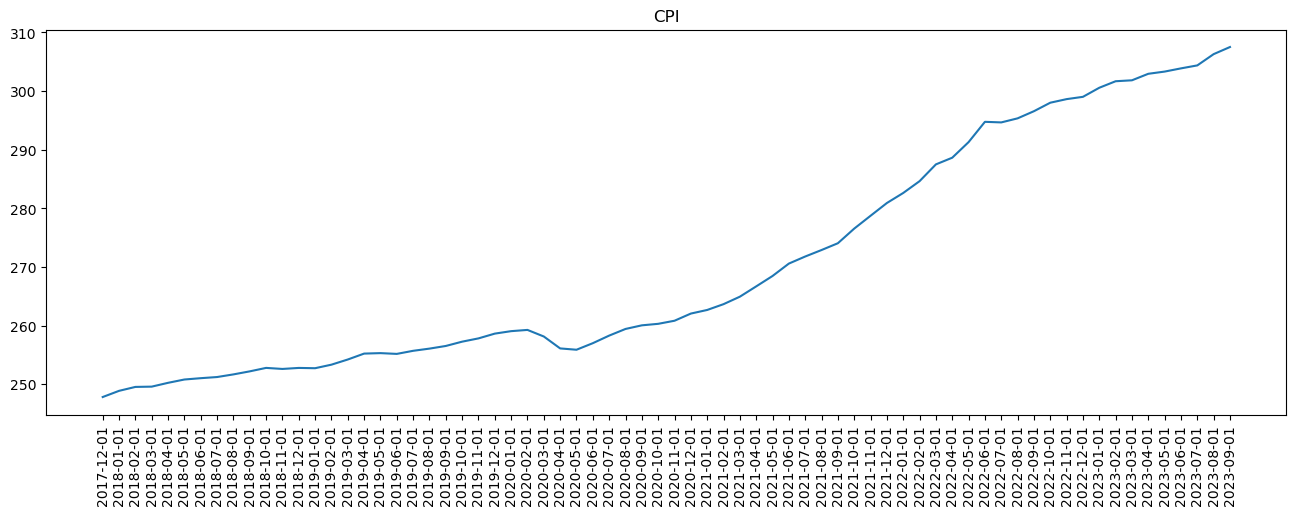

<Figure size 640x480 with 0 Axes>

In [83]:
cpiDataFrame = pd.read_csv(
    os.path.join("./", "data", "ConsumerPriceIndex.csv"),
    date_format = "%Y-%m-%d",
    parse_dates = ["DATE"]
    )
cpiDataFrame["DATE"] = pd.to_datetime(cpiDataFrame["DATE"])

figure, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16,5))
ax.plot(cpiDataFrame["CPIAUCSL"])
ax.set_title("CPI")
ax.set_xticks(np.arange(0, cpiDataFrame["DATE"].shape[0], 1))
xLabels = cpiDataFrame["DATE"].astype(str)

ax.set_xticklabels(xLabels, rotation = 90)
plt.show()
plt.clf()

In [84]:

cpiInterpolatedDataFrame : pd.DataFrame = pd.DataFrame(columns = ["Date", "CPI"])

for i in range(0, cpiDataFrame.shape[0] - 1) :
    firstValue = cpiDataFrame.iloc[i]["CPIAUCSL"]
    secondValue = cpiDataFrame.iloc[i + 1]["CPIAUCSL"]
    valueDiff = secondValue - firstValue

    firstDate = cpiDataFrame.iloc[i]["DATE"]
    secondDate = cpiDataFrame.iloc[i + 1]["DATE"]
    dateDiff = secondDate - firstDate

    diffDays = dateDiff.days
    interValue = valueDiff / diffDays

    interpolatedValue = firstValue
    currDate = firstDate
    for dateIncr in range(1, diffDays + 1) :
        newRow = [currDate, interpolatedValue]
        cpiInterpolatedDataFrame.loc[len(cpiInterpolatedDataFrame)] = newRow

        interpolatedValue = interpolatedValue + interValue
        currDate = currDate + pd.Timedelta(days = 1)

lastDate = currDate
lastValue = interpolatedValue

cpiInterpolatedDataFrame.loc[len(cpiInterpolatedDataFrame)] = [lastDate, lastValue]
dateTimeStartDate = datetime.datetime.strptime(extractionStartDate, '%Y-%m-%d')
cpiFirstDate = dateTimeStartDate - datetime.timedelta(days = 1)
cpiInterpolatedDataFrame = cpiInterpolatedDataFrame[cpiInterpolatedDataFrame["Date"] >= datetime.datetime(year = cpiFirstDate.year, month = cpiFirstDate.month, day = cpiFirstDate.day)]
cpiInterpolatedDataFrame.reset_index(drop = True, inplace = True)

cpiInterpolatedDataFrame["Infation"] = cpiInterpolatedDataFrame["CPI"].pct_change() * 100
cpiInterpolatedDataFrame.dropna(inplace = True)
cpiInterpolatedDataFrame.reset_index(inplace = True, drop = True)
cpiInterpolatedDataFrame

Date         CPI  Infation
0    2018-01-01  248.859000  0.013664
1    2018-01-02  248.880613  0.008685
2    2018-01-03  248.902226  0.008684
3    2018-01-04  248.923839  0.008683
4    2018-01-05  248.945452  0.008683
...         ...         ...       ...
2065 2023-08-28  307.324613  0.012723
2066 2023-08-29  307.363710  0.012722
2067 2023-08-30  307.402806  0.012720
2068 2023-08-31  307.441903  0.012718
2069 2023-09-01  307.481000  0.012717

[2070 rows x 3 columns]

In [11]:
for crypto in cryptoList :
    dataFrame : pd.DataFrame = cryptoDataFrameDict[crypto]
    dataFrame["NormalizedClose"] = dataFrame["Close"] * (1 - (cpiInterpolatedDataFrame["Infation"]))

cryptoDataFrameDict["ETH-USD"]

Date         Open         High          Low        Close  \
0     2018-01-01   755.757019   782.530029   742.004028   772.640991   
1     2018-01-02   772.346008   914.830017   772.346008   884.443970   
2     2018-01-03   886.000000   974.471008   868.450989   962.719971   
3     2018-01-04   961.713013  1045.079956   946.085999   980.921997   
4     2018-01-05   975.750000  1075.390015   956.325012   997.719971   
...          ...          ...          ...          ...          ...   
2065  2023-08-28  1657.439819  1659.328735  1627.446777  1652.457397   
2066  2023-08-29  1652.274170  1742.637329  1639.576172  1729.725708   
2067  2023-08-30  1729.676636  1730.564697  1697.147217  1705.112183   
2068  2023-08-31  1705.364502  1720.011963  1634.850952  1645.639160   
2069  2023-09-01  1645.581299  1653.531738  1603.034180  1628.491211   

        Adj Close       Volume  NormalizedClose  
0      772.640991   2595760128       762.083453  
1      884.443970   5783349760       876.762752  
2      962.719971   5093159936       954.359668  
3      980.921997   6502859776       972.404366  
4      997.719971   6683149824       989.057231  
...           ...          ...              ...  
2065  1652.457397   4855588534      1631.432731  
2066  1729.725708  11304916729      1707.720736  
2067  1705.112183   5023904190      1683.423095  
2068  1645.639160   6593153505      1624.709233  
2069  1628.491211   6104510092      1607.782013  

[2070 rows x 8 columns]

## 2] Analisi del Dataset

### 2.1] Passaggio al Logaritmo

Per avere una maggiore stabilità dei valori numerici, passiamo allo studio del logaritmo dei prezzi di chiusura considerandolo come proxy dello studio condotto sui valori originali.

In [97]:
for crypto in cryptoList :
    cryptoDataFrameDict[crypto]["LogClosePrice"] = np.log10(cryptoDataFrameDict[crypto]["NormalizedClose"])

cryptoDataFrameDict["BTC-USD"]

Date          Open          High           Low         Close  \
0     2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
1     2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2     2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
3     2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
4     2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...          ...           ...           ...           ...           ...   
2065  2023-08-28  26089.615234  26198.578125  25880.599609  26106.150391   
2066  2023-08-29  26102.486328  28089.337891  25912.628906  27727.392578   
2067  2023-08-30  27726.083984  27760.160156  27069.207031  27297.265625   
2068  2023-08-31  27301.929688  27456.078125  25752.929688  25931.472656   
2069  2023-09-01  25934.021484  26125.869141  25362.609375  25800.724609   

         Adj Close       Volume  NormalizedClose  LogClosePrice  
0     13657.200195  10291200000     13470.585182       4.129386  
1     14982.099609  16846600192     14851.983090       4.171784  
2     15201.000000  16871900160     15068.993839       4.178084  
3     15599.200195  21783199744     15463.747809       4.189315  
4     17429.500000  23840899072     17278.167730       4.237498  
...            ...          ...              ...            ...  
2065  26106.150391  11002805166     25773.994720       4.411182  
2066  27727.392578  29368391712     27374.654281       4.437349  
2067  27297.265625  16343655235     26950.043426       4.430559  
2068  25931.472656  20181001451     25601.665345       4.408268  
2069  25800.724609  17202862221     25472.621935       4.406074  

[2070 rows x 9 columns]

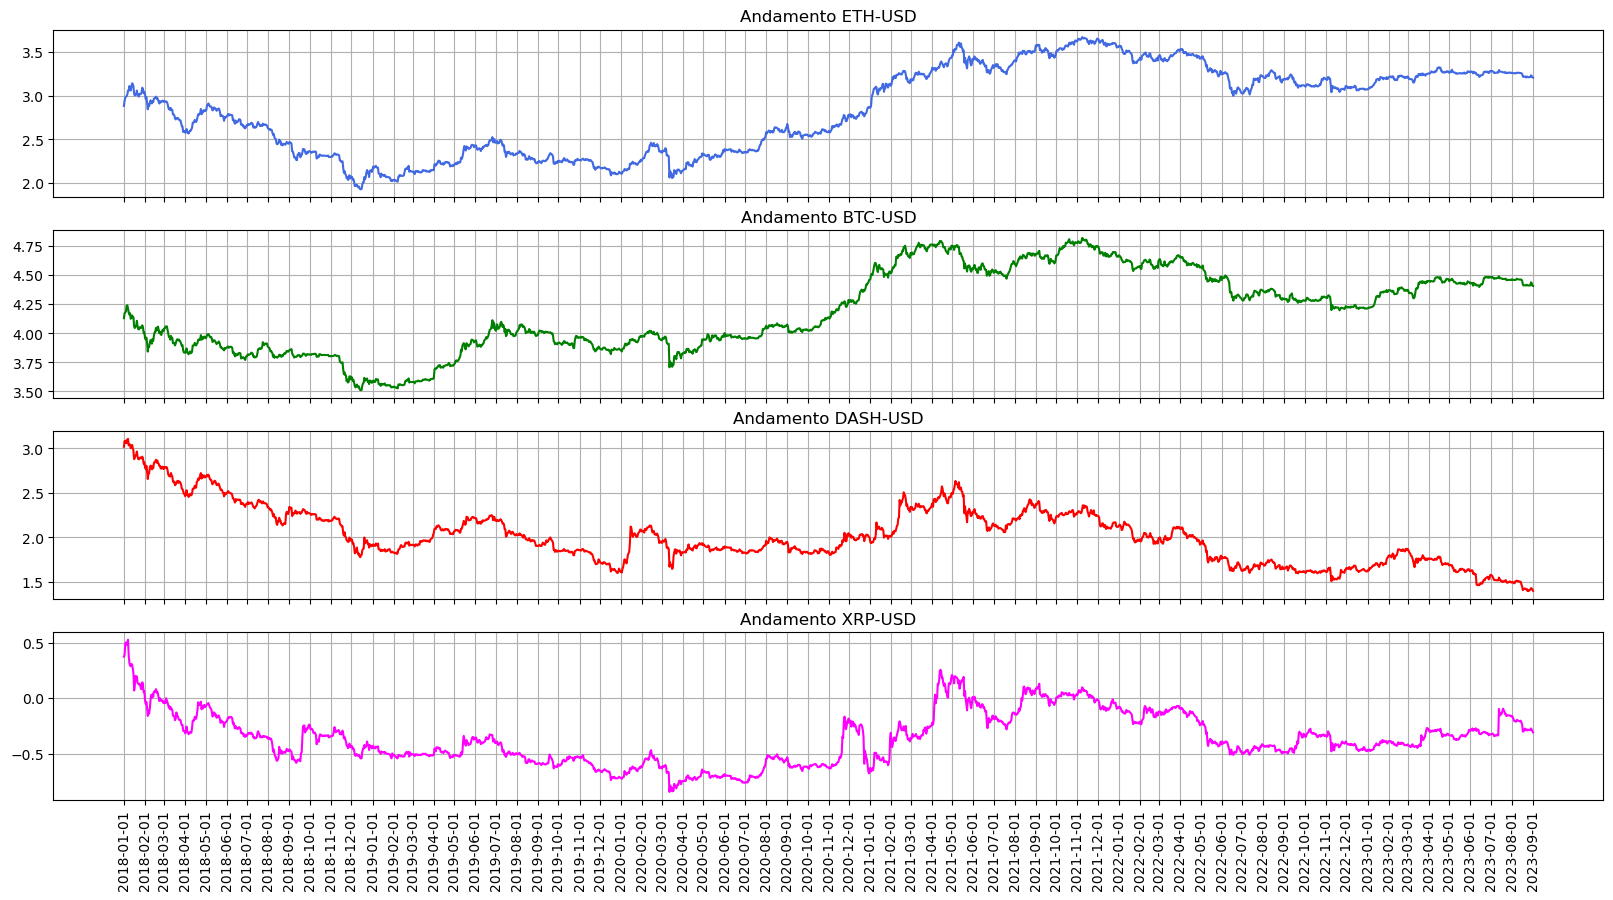

<Figure size 640x480 with 0 Axes>

In [95]:
figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0 
for crypto in cryptoList :
    axs[i].plot(cryptoDataFrameDict[crypto]["LogClosePrice"], color = colors[i % len(colors)])
    axs[i].set_title("Andamento " + crypto)
    axs[i].grid(True)
    i += 1

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()

Tracciamo gli autocorrelogrammi e gli autocorrelogrammi parziali delle serie dei prezzi logaritmici.
Ricordiamo che:
* Gli autocorrelogrammi rappresantono l'influenza del punto $X_0$ al tempo $X_t$ tenendo conto dei tempi $i$ dove $\forall i=1,...,t-1$
* Gli autocorrelogrammi parziali rappresantono l'influenza del punto $X_0$ al tempo $X_t$ NON tenendo conto dei tempi $i$ dove $\forall i=1,...,t-1$

Come si vede dai grafici:
- Negli autocorelogrammi abbiamo un andamento che tende a scemare nel tempo e questo è dovuto al fatto che l'influenza del punto $X_0$ è sempre più debole con il tempo
- Negli autocorelogrammi parziali abbiamo un picco sul primo punto $X_1$, segno del fatto che l'influenza del punto precedente su quello successivo è alta, ma un'influenza più debole sui punti successivi

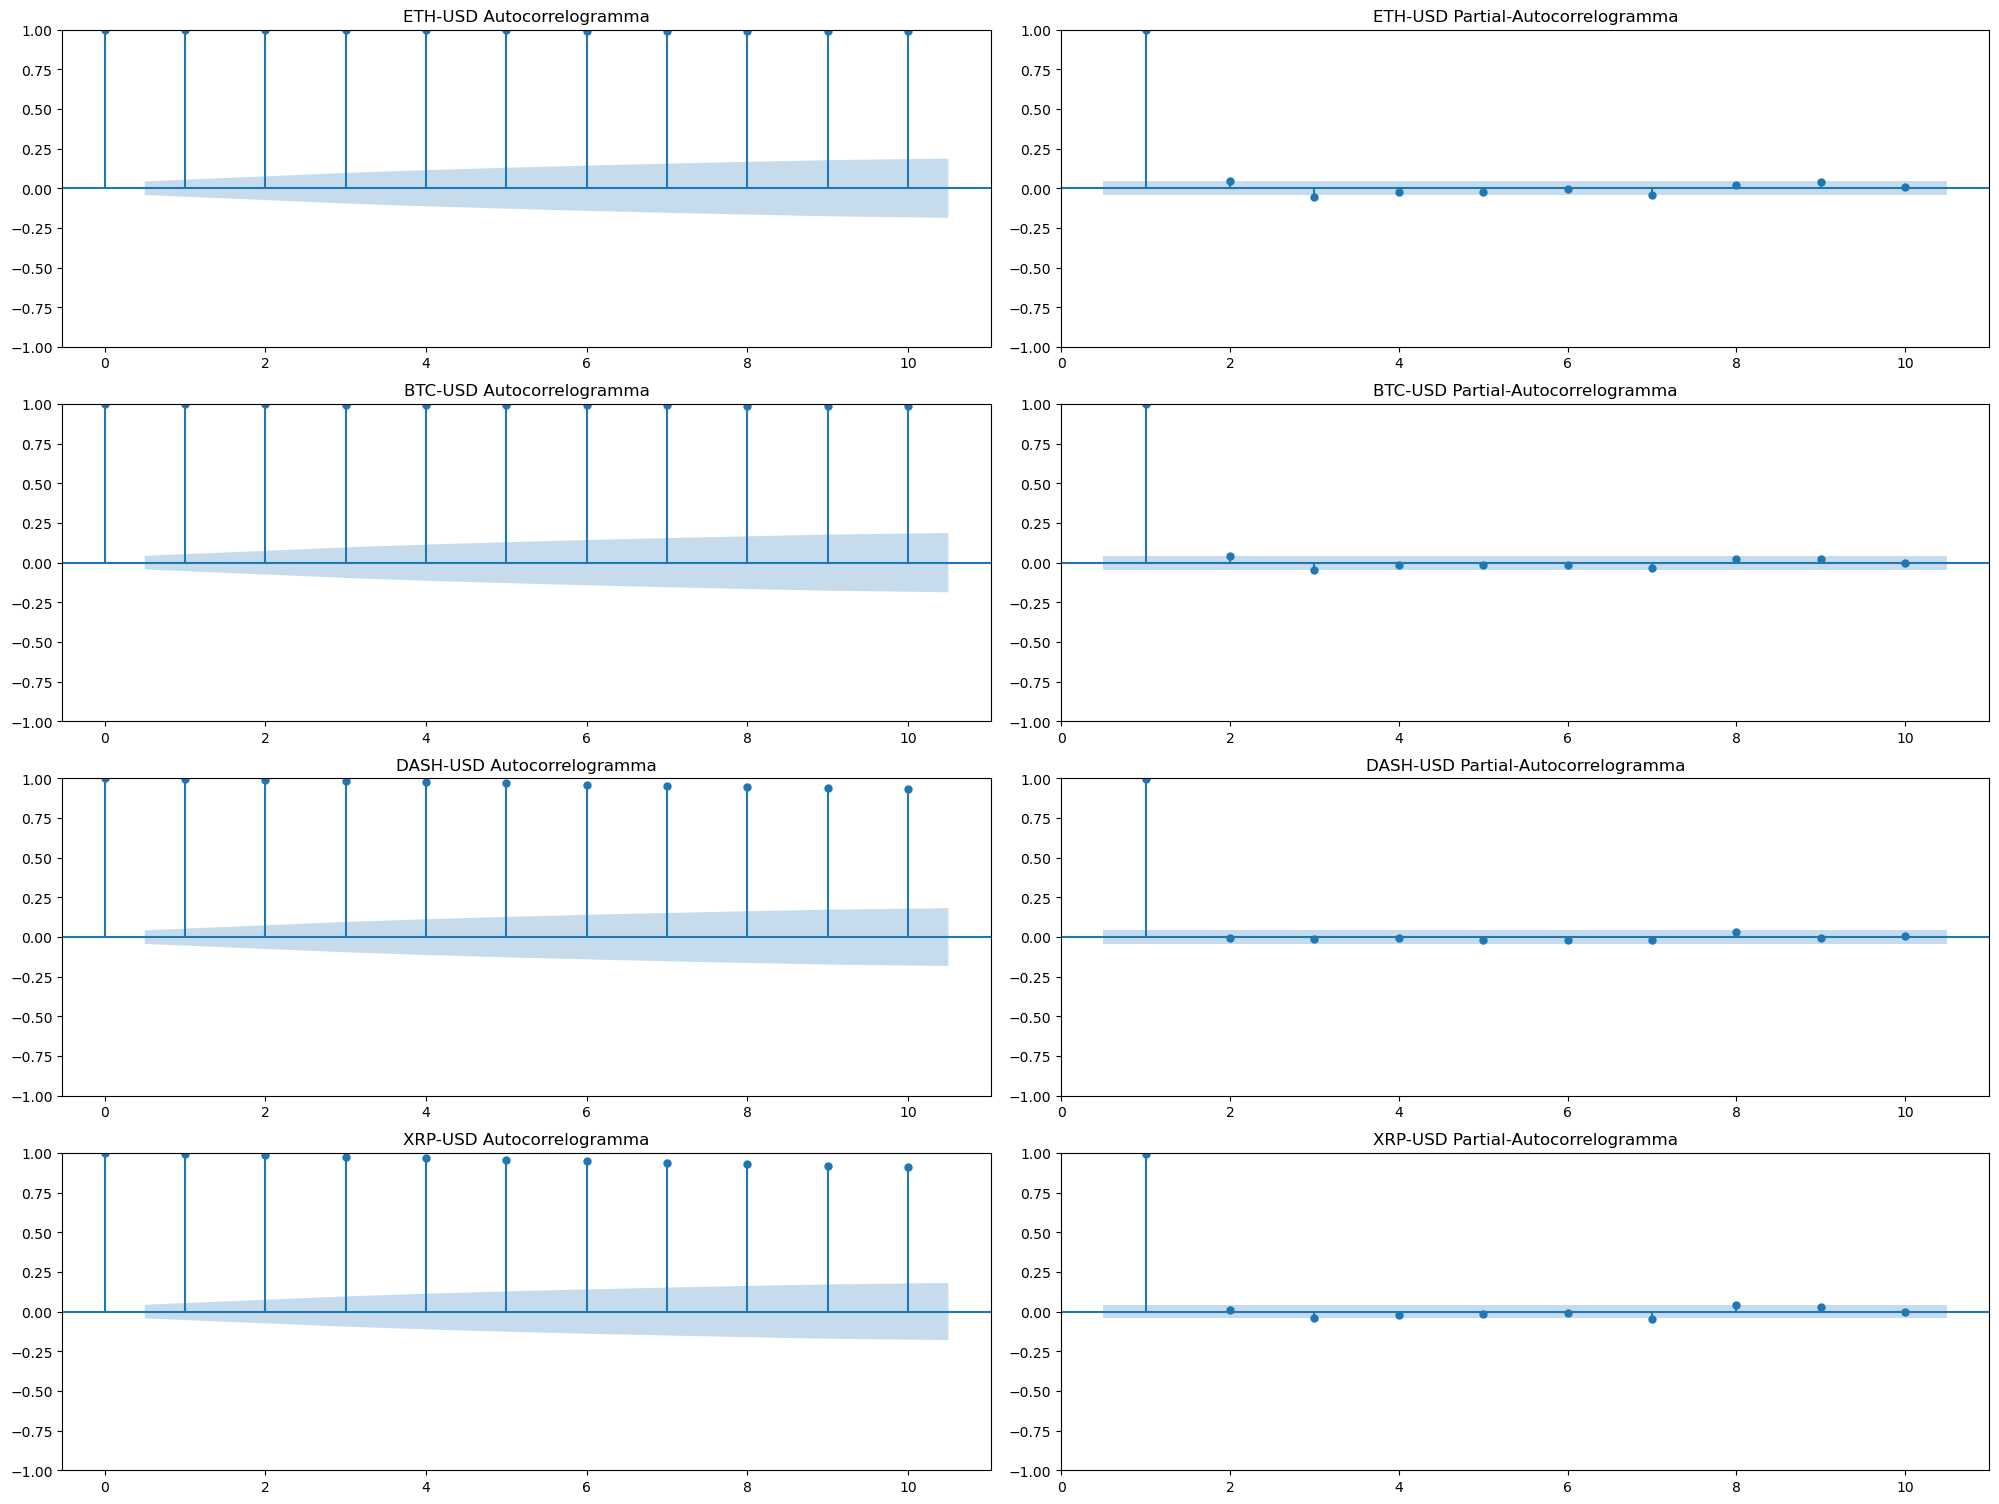

<Figure size 640x480 with 0 Axes>

In [15]:
correlograms(cryptoDataFrameDict, "LogClosePrice", cryptoList, "Autocorrelogramma", "Partial-Autocorrelogramma", zeroPar = False)

### 2.2] Ricerca di una componenti di Random Walk
Cerchiamo una componente di Random Walk all'interno delle serie.

La presenza di una componente di Random Walk nella serie è indice del fatto che il mercato non è prevedibile e che quindi il suo andamento può salire o scendere in modo casuale, ovvero assume valori:
* $+1$ con probabilità $p$
* $-1$ con probabilità $1-p$

Le componenti di Random Walk vengono ricercate usando due Test di Ipotesi:
* ADF
* KPSS

Nel test di KPSS abbiamo:
* $H_0$ : La serie è stazionaria attorno a una tendenza deterministica (NON ha componente di Random Walk)
* $H_1$ : La serie non è stazionaria (HA componente di Random Walk)

Nel test di ADF abbiamo:
* $H_0$ : La serie ha una radice unitaria (HA componente di Random Walk)
* $H_1$ : La serie non ha una radice unitaria (NON ha componente di Random Walk)

Nel nostro caso vogliamo:
* KPSS, **Rigettare**
* ADF, **Accettare**

In [16]:
kpss_test(cryptoDataFrameDict, "LogClosePrice", cryptoList)
adf_test(cryptoDataFrameDict, "LogClosePrice", cryptoList)

                        KPSS                        
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  4.630432272815153 │   0.01 │ Reject  │
│ BTC-USD  │  4.820559865672976 │   0.01 │ Reject  │
│ DASH-USD │ 2.7531299544913352 │   0.01 │ Reject  │
│ XRP-USD  │  0.918683154822733 │   0.01 │ Reject  │
└──────────┴────────────────────┴────────┴─────────┘

                                ADF                                
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ -0.9501313424178288 │   0.7710157360162664 │ Accept  │
│ BTC-USD  │  -0.978510604401754 │   0.7610211585021541 │ Accept  │
│ DASH-USD │ -2.8180938650045064 │   0.0557353087206187 │ Accept  │
│ XRP-USD  │  -3.500868599705032 │ 0.007964814582617451 │ Reject  │
└──────────┴─────────────────────┴──────────────────────┴─────────┘

Dai test condotti si vede che tutte le serie hanno natura di Random Walk, fatta eccezione per l'ultima che non passa il test *ADF*. Tuttavia, passando il test *KPSS* ed essendo il valore del *pValue* abbastanza vicino al limite possiamo concludere che il trend stocastico sia presente anche per la crypto *XRP-USD* ma che sia un trend debole.

### 2.3] Differencing della serie storica e analisi del rumore
Procediamo lo studio con l'analisi del rumore.

Passiamo al differencing della serie storica, ottenendo $Y_{t+1} - Y_{t} = W_{t}$ e procedendo con un'analisi del termine $W_{t}$.

Il differencing viene fatto sul risultato del passaggio al logaritmo dei valori originari. Siano:
* *Y*, valori logaritmici
* *P*, valori originari
* *R*, rendimento

Fare il differencing dei valori logaritmici ci permette di fare quanto segue:

$Y_{t+1} - Y_{t} = \log(P_{t+1}) - \log(P_t) = \log(\frac{P_{t+1}}{P_{t}}) = \log(R) = W_t$

Ovvero analizzare se il rendimento ha o meno natura di *White Noise*, controllando:
* Stazionarietà
* Eteroschedasticità
* Autocorrelazione
* Gaussianità

In [17]:
differencingDict : dict[str, pd.DataFrame] = {}
for crypto in cryptoDataFrameDict :
    logPriceSeries : pd.Series = cryptoDataFrameDict[crypto]["LogClosePrice"]
    differencing : pd.Series = logPriceSeries.diff()
    differencing.dropna(inplace = True)
    differencing.reset_index(inplace = True, drop = True)
    differencingDict[crypto] = pd.DataFrame({"Diff" : differencing.values, "QuadDiff" : (differencing.pow(2)).values})

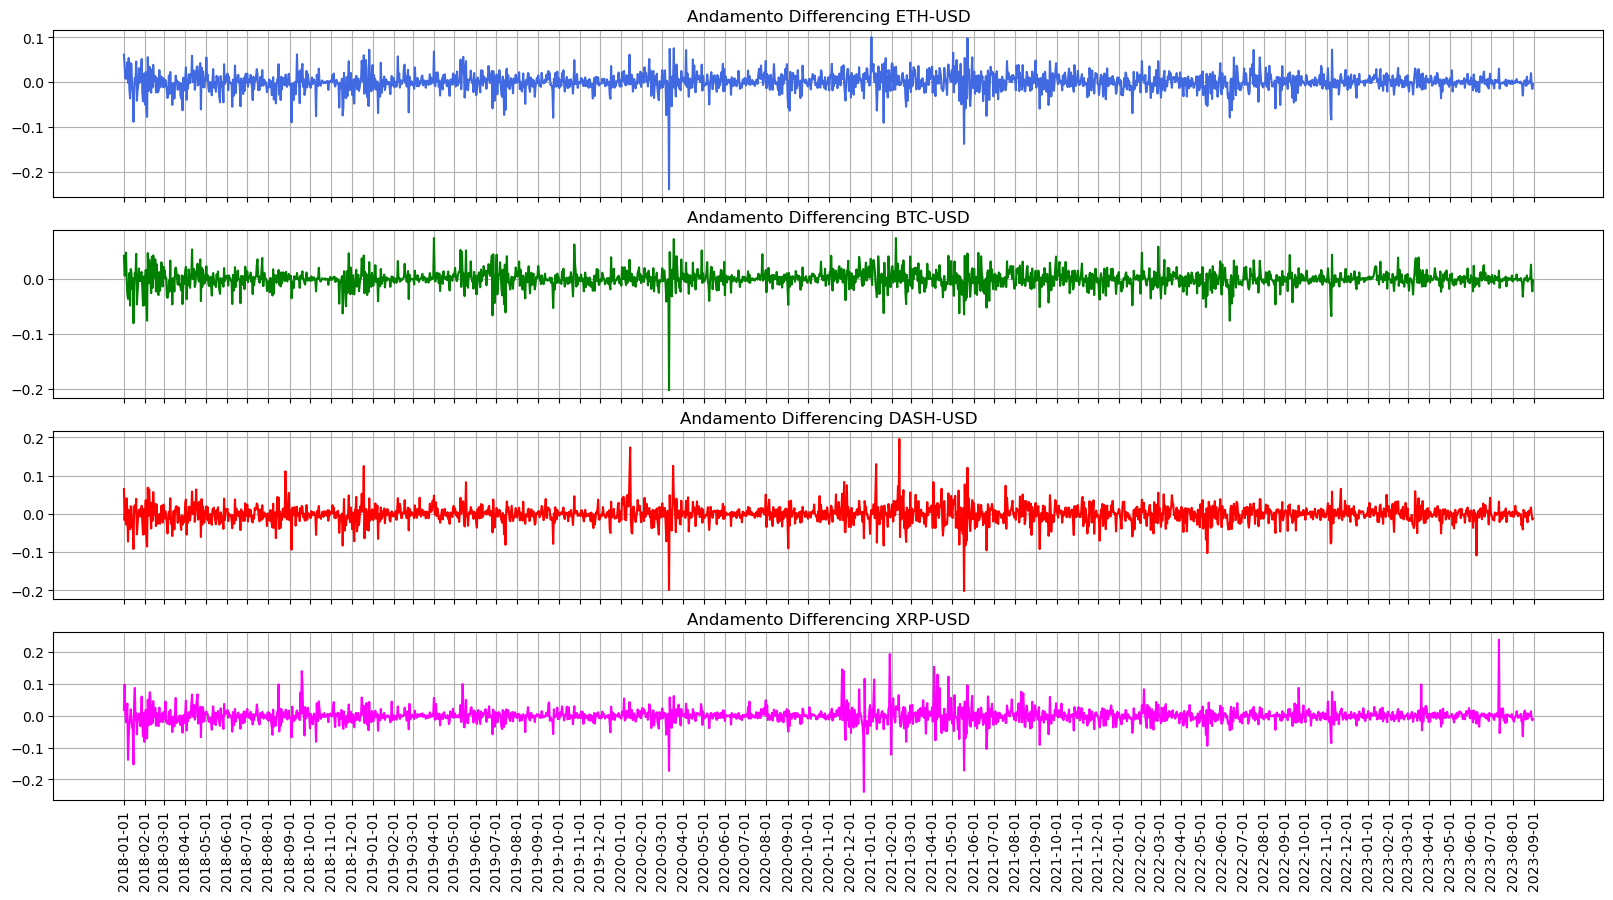

<Figure size 640x480 with 0 Axes>

In [18]:
figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0 
for crypto in cryptoList :
    axs[i].plot(differencingDict[crypto]["Diff"], color = colors[i % len(colors)])
    axs[i].set_title("Andamento Differencing " + crypto)
    axs[i].grid(True)
    i += 1

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()

#### 2.3.1] Analisi Stazionarietà
Per l'analisi di stazionarietà eseguiamo due test:
* KDSS
* Adfuller

Nel test di KPSS abbiamo:
* *H0* : La serie è stazionaria attorno a una tendenza deterministica
* *H1* : La serie non è stazionaria

Nel test di Adfuller abbiamo:
* *H0* : La serie ha una radice unitaria
* *H1* : La serie non ha una radice unitaria

Nel nostro caso vogliamo:
* KPSS, **Accettare**
* Adfuller, **Rigettare**

In [19]:
kpss_test(differencingDict, "Diff", cryptoList)
adf_test(differencingDict, "Diff", cryptoList)

                        KPSS                         
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.23201574524870314 │    0.1 │ Accept  │
│ BTC-USD  │ 0.15674142996559834 │    0.1 │ Accept  │
│ DASH-USD │ 0.13769918829263092 │    0.1 │ Accept  │
│ XRP-USD  │ 0.19808342863898767 │    0.1 │ Accept  │
└──────────┴─────────────────────┴────────┴─────────┘

                                 ADF                                 
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ -13.748813873133498 │ 1.0600349812346284e-25 │ Reject  │
│ BTC-USD  │ -31.470467916876196 │                    0.0 │ Reject  │
│ DASH-USD │ -21.645263875919735 │                    0.0 │ Reject  │
│ XRP-USD  │  -46.79501030099321 │                    0.0 │ Reject  │
└──────────┴─────────────────────┴────────────────────────┴─────────┘

Dal test di KPSS e dal test ADF, possiamo concludere che il differencing $W_t$ è stazionario

#### 2.3.2] Analisi Eteroschedasticità
Per l'analisi di eteroschedasticità eseguiamo i seguenti test:
* Breusch-Pagan
* White

Nel test di Breusch-Pagan abbiamo:
* $H_0$: I residui sono distribuiti con varianza omogenea (La serie è Omoschedastica)
* $H_1$: I residui *NON* sono distribuiti con varianza omogenea (La serie *NON* è omoschedastica)

Nel test di White abbiamo:
* $H_0$: La varianza dei residui è costante (La serie è Omoschedastica)
* $H_1$: La varianza dei residui *NON* è costante (La serie *NON* è Omoschedastica)

In questo caso vogliamo:
* Breusch-Pagan, **Accettare**
* White, **Accettare**

In [20]:
breusch_pagan_test(differencingDict, "Diff", cryptoList, printSummary = True)
white_test(differencingDict, "Diff", cryptoList)

ETH-USD
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5481
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.459
Time:                        15:51:22   Log-Likelihood:                 5049.8
No. Observations:                2069   AIC:                        -1.010e+04
Df Residuals:                    2067   BIC:                        -1.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.472      0.637      -0.002       0.001
x1          5.746e-07   7.76e-07      0.740      0.459   -9.47e-07     2.1e-06
==============================================================================
Omnibus:                      632.947   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10358.413
Skew:                          -0.995   Prob(JB):                         0.00
Kurtosis:                      13.779   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

BTC-USD
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1443
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.704
Time:                        15:51:22   Log-Likelihood:                 5578.7
No. Observations:                2069   AIC:                        -1.115e+04
Df Residuals:                    2067   BIC:                        -1.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.143      0.887      -0.002       0.001
x1          2.283e-07   6.01e-07      0.380      0.704    -9.5e-07    1.41e-06
==============================================================================
Omnibus:                      697.962   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16730.990
Skew:                          -1.029   Prob(JB):                         0.00
Kurtosis:                      16.778   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

DASH-USD
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3637
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.547
Time:                        15:51:22   Log-Likelihood:                 4747.7
No. Observations:                2069   AIC:                            -9491.
Df Residuals:                    2067   BIC:                            -9480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -1.252      0.211      -0.003       0.001
x1          5.417e-07   8.98e-07      0.603      0.547   -1.22e-06     2.3e-06
==============================================================================
Omnibus:                      376.450   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8823.543
Skew:                          -0.083   Prob(JB):                         0.00
Kurtosis:                      13.116   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

XRP-USD
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.386
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.239
Time:                        15:51:22   Log-Likelihood:                 4673.8
No. Observations:                2069   AIC:                            -9344.
Df Residuals:                    2067   BIC:                            -9332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.001     -1.315      0.189      -0.004       0.001
x1          1.096e-06   9.31e-07      1.177      0.239    -7.3e-07    2.92e-06
==============================================================================
Omnibus:                      510.216   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22254.586
Skew:                           0.337   Prob(JB):                         0.00
Kurtosis:                      19.053   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

                           Breusch-Pagan                           
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  8.567367566736669 │ 0.0034597918568196914 │ Reject  │
│ BTC-USD  │  7.763759935805086 │  0.005379165131515243 │ Reject  │
│ DASH-USD │  2.276765009171112 │    0.1314783730532143 │ Accept  │
│ XRP-USD  │ 1.2467607341644058 │    0.2643018406639988 │ Accept  │
└──────────┴────────────────────┴───────────────────────┴─────────┘

                              White                               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │   5.26508181913567 │ 0.005238555530471663 │ Reject  │
│ BTC-USD  │  4.141400487811925 │ 0.016032762971599328 │ Reject  │
│ DASH-USD │  3.666072606577798 │ 0.025743255972081297 │ Reject  │
│ XRP-USD  │ 0.7598677076192619 │   0.4678589731665155 │ Accept  │
└──────────┴────────────────────┴──────────────────────┴─────────┘

Notiamo che *XRP-USD* è l'unica delle Crypto per cui il test passa: analizzando il grafico possiamo notare come ci sia una certa costanza nella volatilità della serie, quindi anche graficamente abbiamo una conferma del risultato.

Per le altre crypto invece abbiamo che, trattandosi di serie abbastanza lunghe, è fattibile che la varianza vari.

#### 2.3.3] Analisi Autocorrelazione

Per l'Autocorrelazione consideriamo i seguenti test:
* Ljung-Box

Per il test Ljung-Box:
* $H_0$: Non c'è autocorrelazione nei dati. In altre parole, i residui sono indipendenti l'uno dall'altro e non mostrano alcuna struttura di autocorrelazione significativa.
* $H_1$: I residui non sono indipendenti e mostrano una struttura di autocorrelazione significativa.

Vogliamo quindi :
* Ljung-Box, **Accettare**

In [21]:
ljung_box_test(differencingDict, "Diff", cryptoList)

                             Ljung-Box                             
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 31.609722534078987 │ 0.0004650065716092994 │ Reject  │
│ BTC-USD  │ 16.925034452734113 │   0.07603932218108504 │ Accept  │
│ DASH-USD │ 15.716773963771859 │   0.10803220218423684 │ Accept  │
│ XRP-USD  │  7.977674132723926 │     0.631017790629593 │ Accept  │
└──────────┴────────────────────┴───────────────────────┴─────────┘

Tracciamo gli autocorrelogrammi e gli autocorrelogrammi parziali dei dati.

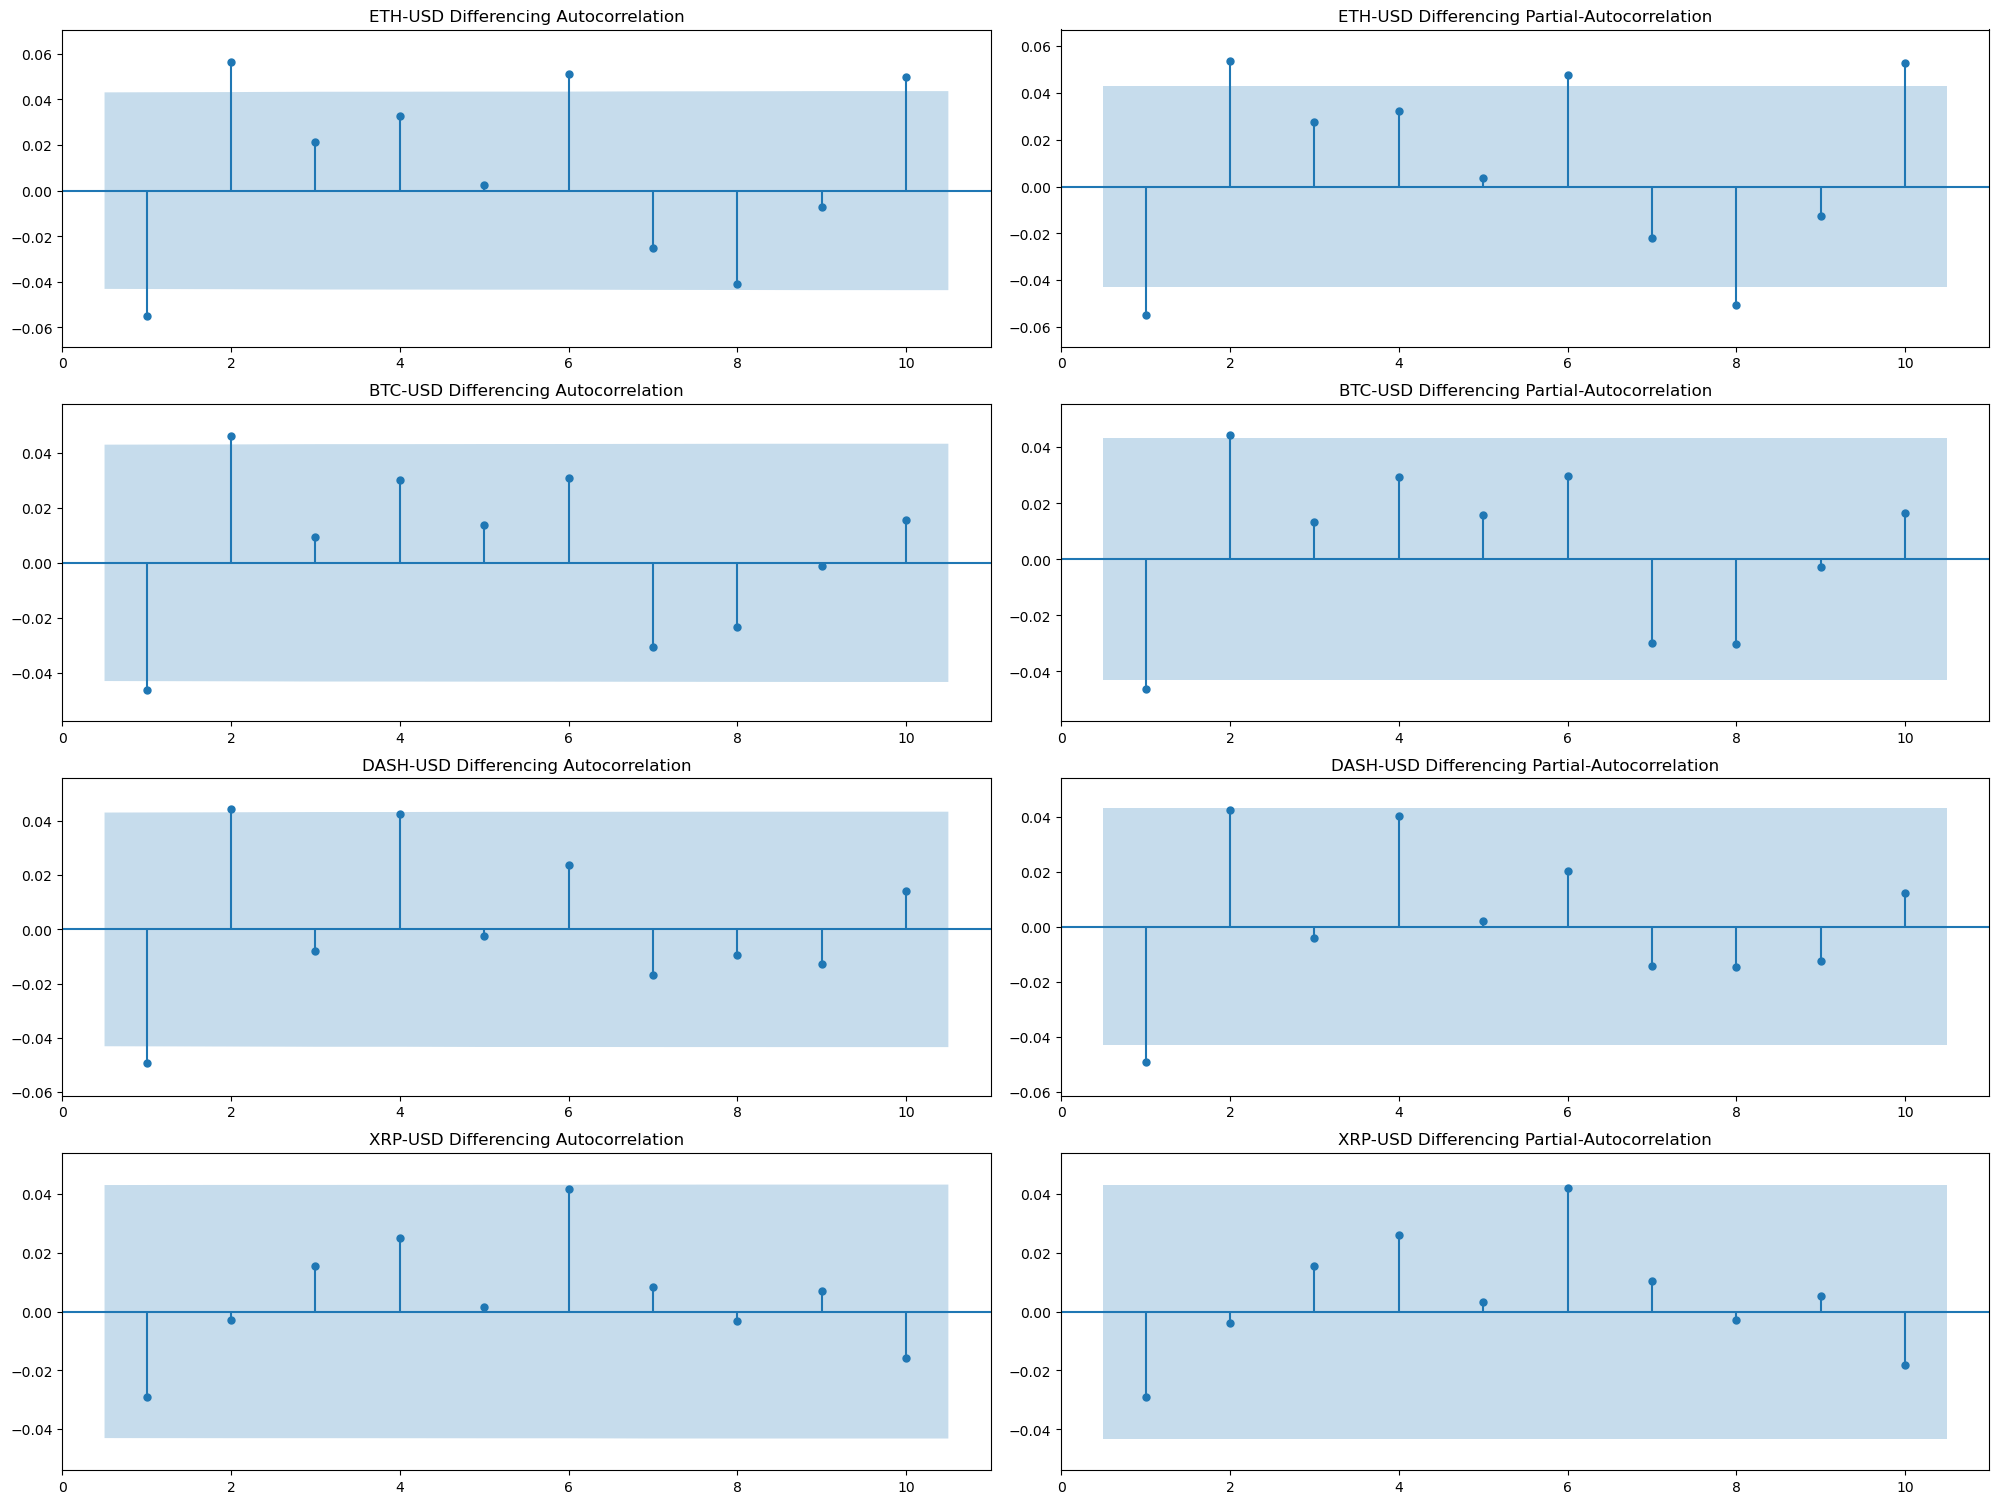

<Figure size 640x480 with 0 Axes>

In [22]:
correlograms(differencingDict, "Diff", cryptoList, titleAuto = "Differencing Autocorrelation", titlePartial = "Differencing Partial-Autocorrelation", zeroAuto = False, yLimsAuto = True, zeroPar = False, yLimsPar = True)

Il test quindi Accetta per entrambi i casi e i dati non dovrebbero essere autocorrelati.
Tuttavia, osservando i grafici relativi al differencing, possiamo notare come vi siano dei cluster di varianza costante, in cui a basse varianze seguono zone di bassa varianza (analogamente per quelle ad alta varianza).

Riassumendo abbiamo:
* Accettazione del test di Ljung-Box
* Presenza di clusterizzazione delle varianze
Questo fenomeno potrebbe essere dovuto al fatto che i dati sono molti, e quindi il grande numero di dati potrebbe offuscare l'autocorrelazione portando i dati a tendere al gaussiano.

Ci fa supporre la presenza di punti di rottura nella struttura. 

Passiamo quindi, dopo dei veloci test sulla gaussianità, all'analisi delle rotture strutturali.

#### 2.3.4] Analisi Normalità
Per l'analisi di normalità eseguiamo i seguenti test:
* Shapiro-Wilk
* Kolmogorov-Smirnov

Nel test di Shapiro-Wilk abbiamo:
* $H_0$: I dati seguono una distribuzione normale
* $H_1$: I dati NON seguono una distribuzione normale

Nel test di Kolmogorov-Smirnov abbiamo:
* $H_0$: I dati seguono la distribuzione specificata
* $H_1$: I dati NON seguono la distribuzione specificata

Nel nostro caso vogliamo:
* Shapiro-Wilk, **Accettare**
* Kolmogorov-Smirnov, **Accettare**

In [23]:
shapiro_wilk(differencingDict, "Diff", cryptoList)
kolmogorov_smirnov(differencingDict, "Diff", cryptoList)

                            Shapiro-Wilk                            
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.9225029349327087 │  2.243272511905845e-31 │ Reject  │
│ BTC-USD  │ 0.9065624475479126 │  7.687562699532387e-34 │ Reject  │
│ DASH-USD │ 0.9040272235870361 │ 3.3494620980164206e-34 │ Reject  │
│ XRP-USD  │ 0.8357081413269043 │   7.15923385423549e-42 │ Reject  │
└──────────┴────────────────────┴────────────────────────┴─────────┘

                 Kolmogorov-Smirnov                  
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  0.4705378122861261 │    0.0 │ Reject  │
│ BTC-USD  │ 0.47608764853183083 │    0.0 │ Reject  │
│ DASH-USD │ 0.46608875744466827 │    0.0 │ Reject  │
│ XRP-USD  │  0.4642030732172747 │    0.0 │ Reject  │
└──────────┴─────────────────────┴────────┴─────────┘

Notiamo quindi che i due test ci fanno rigettare in entrambi i casi l'ipotesi nulla di normalità dei dati.

### 2.4] Analisi dei Punti di Rottura nella Struttura
Cerchiamo i punti di rottura usando le funzioni di R:
* *breakpoints*
* *fstats*
* *supMZ*

In [24]:
# Loading the function we have defined in R.
r['source']('./R/R_Scripts.R')

breakPointSearch_R = robjects.globalenv['breakPointSearch']
fstatBreakpointsSearch_R = robjects.globalenv['fstatBreakpointsSearch']
supmzBreakpointsSearch_R = robjects.globalenv['supmzBreakpointsSearch']

cryptoBreakPointsDict_1 = {}
cryptoBreakPointsDict_2 = {}
cryptoBreakPointsDict_3 = {}

for crypto in cryptoList :
    ## Converting to R dataFrame
    closePrice_R = pandas2ri.py2rpy(cryptoDataFrameDict[crypto]["LogClosePrice"])

    # Invoking R function
    breakPointsList_R = breakPointSearch_R(closePrice_R)

    #Converting it back to a pandas dataframe.
    breakPointsList = np.array(breakPointsList_R)

    breakPointsList = [int(elem - 1) for elem in breakPointsList]
    cryptoBreakPointsDict_1[crypto] = breakPointsList

    fstatPointsList_R = fstatBreakpointsSearch_R(closePrice_R)
    fstatBreakPointsList = np.array(fstatPointsList_R)
    fstatBreakPointsList = [int(elem - 1) for elem in fstatBreakPointsList]
    cryptoBreakPointsDict_2[crypto] = fstatBreakPointsList

    logClosePriceDataFrame = pd.DataFrame(cryptoDataFrameDict[crypto]["LogClosePrice"], columns = ["LogClosePrice"])
    logClosePriceDF_R = pandas2ri.py2rpy(logClosePriceDataFrame)
    supmzPointsList_R = supmzBreakpointsSearch_R(logClosePriceDF_R)
    supmzBreakPointsList = list(supmzPointsList_R)
    cryptoBreakPointsDict_3[crypto] = supmzBreakPointsList

In [25]:
breakPointsTable = buildTable("Structural Breakpoints", ["Crypto", "Breakpoint", "FStats", "SupMZ"], ["left", "right", "right", "right"])
for crypto in cryptoList :
    datesString_1 = "| "
    datesString_2 = "| "
    datesString_3 = "| "
    for breakpoint in cryptoBreakPointsDict_1[crypto] :
        date = cryptoDataFrameDict[crypto]["Date"].loc[breakpoint]
        datesString_1 += date + " | "
    for breakpoint in cryptoBreakPointsDict_2[crypto] :
        date = cryptoDataFrameDict[crypto]["Date"].loc[breakpoint]
        datesString_2 += date + " | "
    for breakpoint in cryptoBreakPointsDict_3[crypto] :
        date = cryptoDataFrameDict[crypto]["Date"].loc[breakpoint]
        datesString_3 += date + " | "
    breakPointsTable.add_row(crypto, datesString_1, datesString_2, datesString_3)

console = Console()
console.print(breakPointsTable)

                                         Structural Breakpoints                                          
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃                                             Breakpoint ┃          FStats ┃           SupMZ ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │  | 2018-11-06 | 2020-02-06 | 2021-01-02 | 2022-05-10 | │  | 2020-12-29 | │  | 2021-01-04 | │
│ BTC-USD  │               | 2019-05-12 | 2020-12-15 | 2022-05-08 | │  | 2020-11-11 | │  | 2020-11-06 | │
│ DASH-USD │  | 2018-11-06 | 2019-09-22 | 2021-01-09 | 2022-05-04 | │  | 2018-11-07 | │  | 2022-05-12 | │
│ XRP-USD  │  | 2018-11-18 | 2019-09-24 | 2021-02-08 | 2022-04-28 | │  | 2021-02-08 | │  | 2021-02-05 | │
└──────────┴────────────────────────────────────────────────────────┴─────────────────┴─────────────────┘

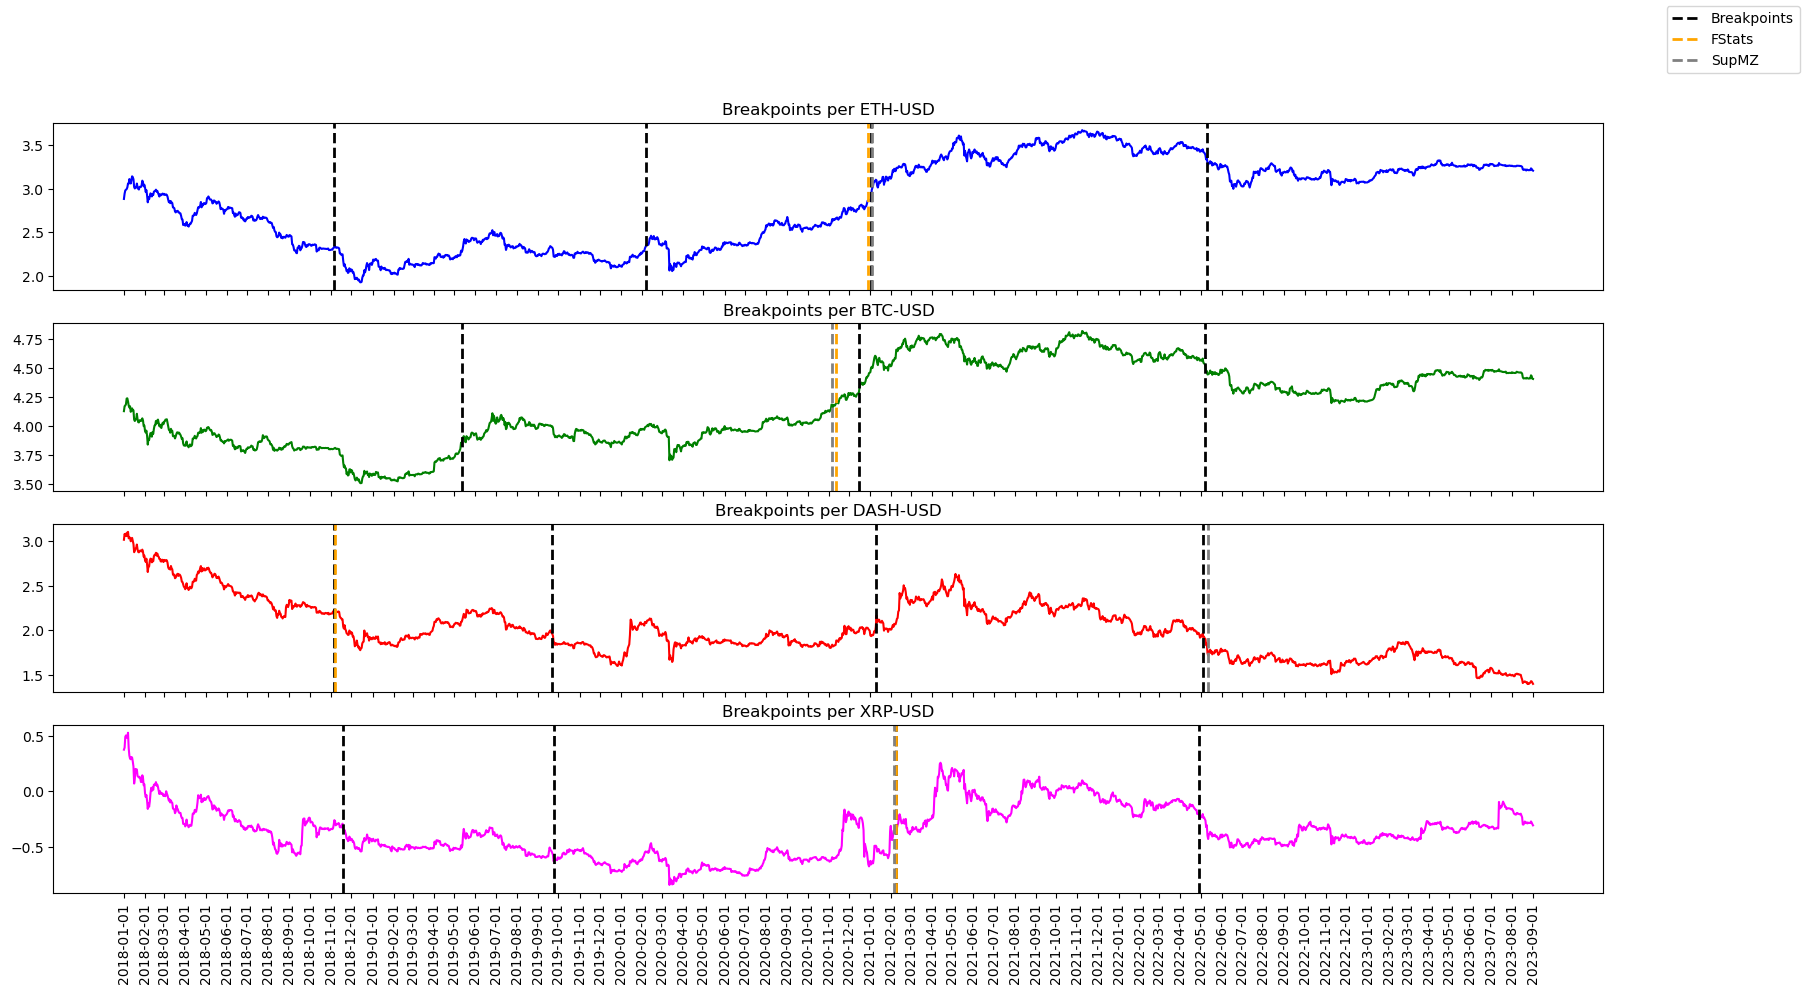

<Figure size 640x480 with 0 Axes>

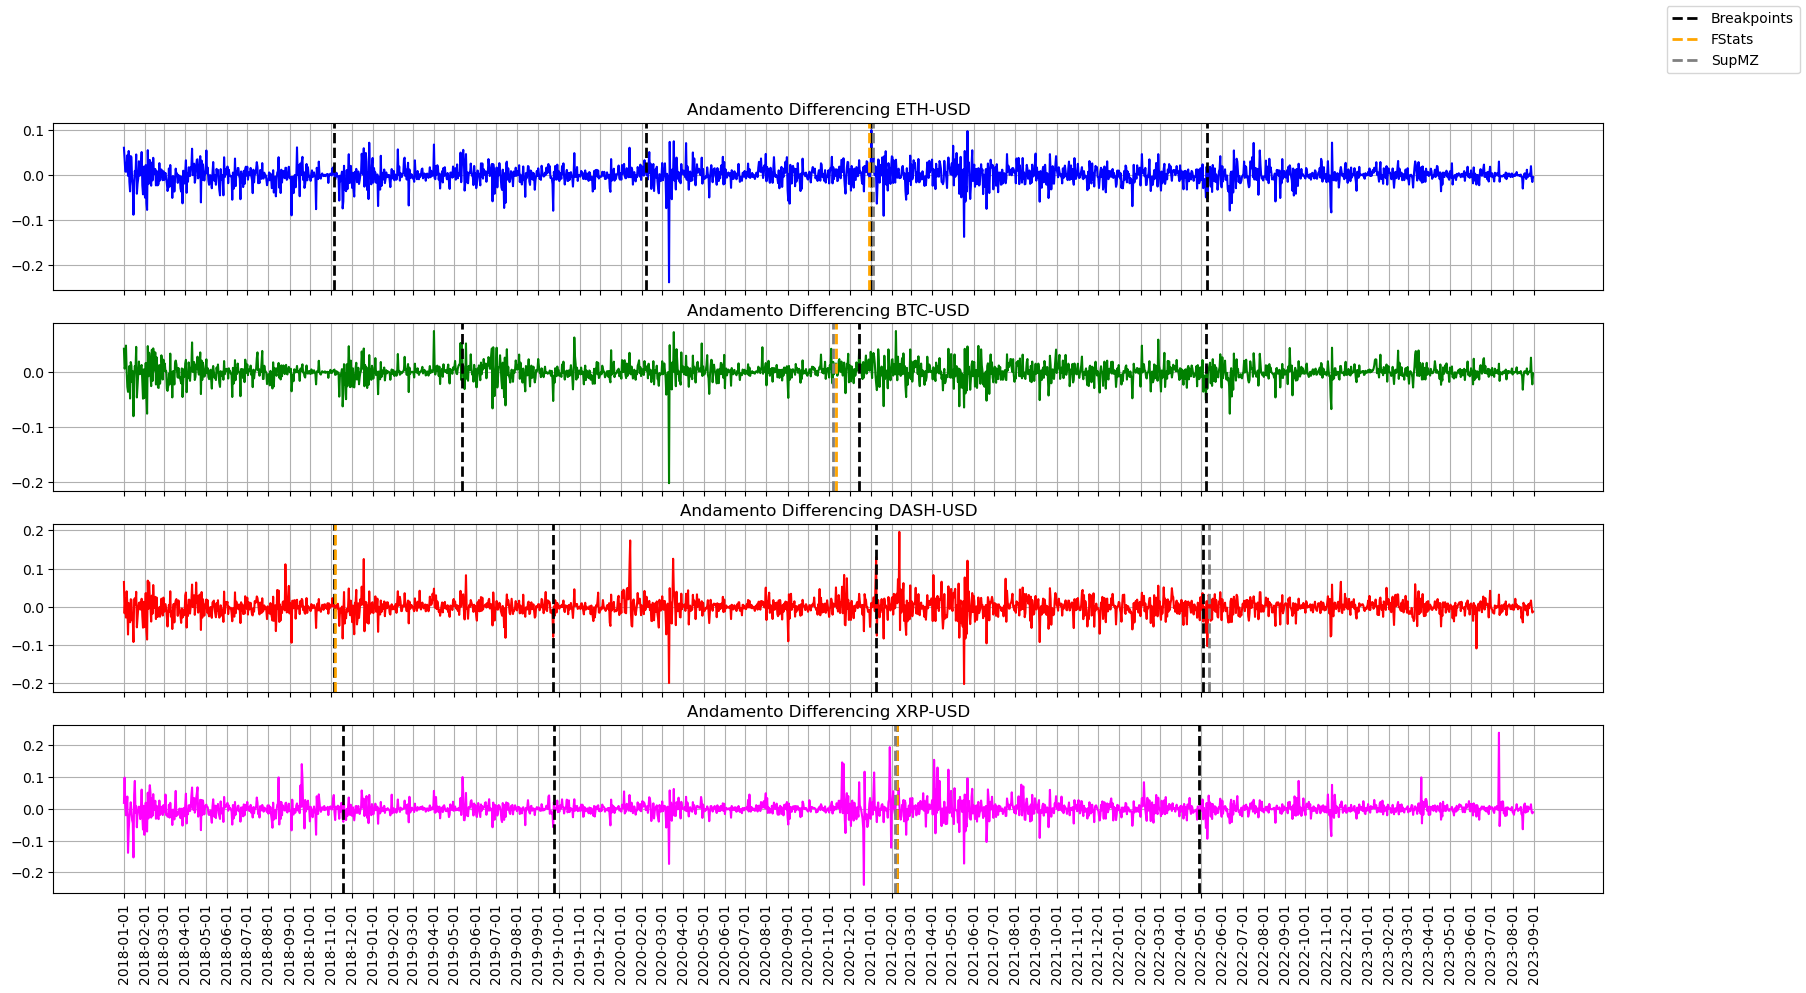

<Figure size 640x480 with 0 Axes>

In [26]:
colors = ["blue", "green", "red", "fuchsia"]

figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0 
legend_1 = True
legend_2 = True
legend_3 = True
for crypto in cryptoList :
    axs[i].plot(cryptoDataFrameDict[crypto]["LogClosePrice"], color = colors[i % len(colors)])
    axs[i].set_title("Breakpoints per " + crypto)
    # axs[i].grid(True)

    for breakpoint in cryptoBreakPointsDict_1[crypto] :
        axs[i].axvline(x = breakpoint, color = "black", linestyle = "--", linewidth = "2", label = "Breakpoints" if legend_1 else None)
        legend_1 = False
    for breakpoint in cryptoBreakPointsDict_2[crypto] :
        axs[i].axvline(x = breakpoint, color = "orange", linestyle = "--", linewidth = "2", label = "FStats" if legend_2 else None)
        legend_2 = False
    for breakpoint in cryptoBreakPointsDict_3[crypto] :
        axs[i].axvline(x = breakpoint, color = "gray", linestyle = "--", linewidth = "2", label = "SupMZ" if legend_3 else None)
        legend_3 = False
    i += 1
figure.legend()

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()


figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0
legend_1 = True
legend_2 = True
legend_3 = True
for crypto in cryptoList :
    axs[i].plot(differencingDict[crypto]["Diff"], color = colors[i % len(colors)])
    axs[i].set_title("Andamento Differencing " + crypto)
    axs[i].grid(True)

    for breakpoint in cryptoBreakPointsDict_1[crypto] :
        axs[i].axvline(x = breakpoint, color = "black", linestyle = "--", linewidth = "2", label = "Breakpoints" if legend_1 else None)
        legend_1 = False
    for breakpoint in cryptoBreakPointsDict_2[crypto] :
        axs[i].axvline(x = breakpoint, color = "orange", linestyle = "--", linewidth = "2", label = "FStats" if legend_2 else None)
        legend_2 = False
    for breakpoint in cryptoBreakPointsDict_3[crypto] :
        axs[i].axvline(x = breakpoint, color = "gray", linestyle = "--", linewidth = "2", label = "SupMZ" if legend_3 else None)
        legend_3 = False
        
    i += 1
figure.legend()

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()

I test rilevano quindi la presenza di punti di rottura.

Notiamo in particolare che test diversi rilevano punti di rottura simili: scegliamo quindi di procedere con un "voto a maggioranza", prendendo il punto di rottura più simile tra i tre test.

## 3] Divisione del dataset
Dividiamo il dataset ristretto per ogni crypto in due parti, training e test set: manteniamo nel training circa il 90% dei dati di ogni strumento.

In [27]:
cryptoBreakPointsIndexes = {
    "ETH-USD" : cryptoBreakPointsDict_1["ETH-USD"][2],
    "BTC-USD" : cryptoBreakPointsDict_1["BTC-USD"][1],
    "DASH-USD" : cryptoBreakPointsDict_1["DASH-USD"][3],
    "XRP-USD" : cryptoBreakPointsDict_1["XRP-USD"][2],
}

In [28]:
restrCryptoDataFrameDict : dict[str, pd.DataFrame] = {}
restrDiffDataFrameDict : dict[str, pd.DataFrame] = {}

for crypto in cryptoList :
    breakPoint = cryptoBreakPointsIndexes[crypto]

    restrictedDataFrame : pd.DataFrame = cryptoDataFrameDict[crypto].iloc[cryptoDataFrameDict[crypto].index >= breakPoint]
    restrictedDataFrame.reset_index(drop = True, inplace = True)
    restrCryptoDataFrameDict[crypto] = restrictedDataFrame

    restrictedDiffDataFrame : pd.DataFrame = differencingDict[crypto].iloc[differencingDict[crypto]["Diff"].index >= breakPoint]
    restrictedDiffDataFrame.reset_index(drop = True, inplace = True)
    restrDiffDataFrameDict[crypto] = restrictedDiffDataFrame

In [29]:
trainCryptoDict : dict[str, pd.DataFrame] = {}
testCryptoDict : dict[str, pd.DataFrame] = {}
trainCryptoDiffDict : dict[str, pd.DataFrame] = {}
testCryptoDiffDict : dict[str, pd.DataFrame] = {}

for crypto in cryptoList :
    totalSize = restrCryptoDataFrameDict[crypto].shape[0]
    trainSize = int((totalSize / 100) * 90)
    testSize = totalSize - trainSize

    trainCryptoDict[crypto] = restrCryptoDataFrameDict[crypto].iloc[restrCryptoDataFrameDict[crypto].index < trainSize]
    trainCryptoDict[crypto].reset_index(drop = True, inplace = True)
    testCryptoDict[crypto] = restrCryptoDataFrameDict[crypto].iloc[restrCryptoDataFrameDict[crypto].index >= trainSize]
    testCryptoDict[crypto].reset_index(drop = True, inplace = True)

    trainCryptoDiffDict[crypto] = restrDiffDataFrameDict[crypto].iloc[restrDiffDataFrameDict[crypto].index < trainSize]
    trainCryptoDiffDict[crypto].reset_index(drop = True, inplace = True)
    testCryptoDiffDict[crypto] = restrDiffDataFrameDict[crypto].iloc[restrDiffDataFrameDict[crypto].index >= trainSize]
    testCryptoDiffDict[crypto].reset_index(drop = True, inplace = True)

## 4] Analisi dei dati ristretti

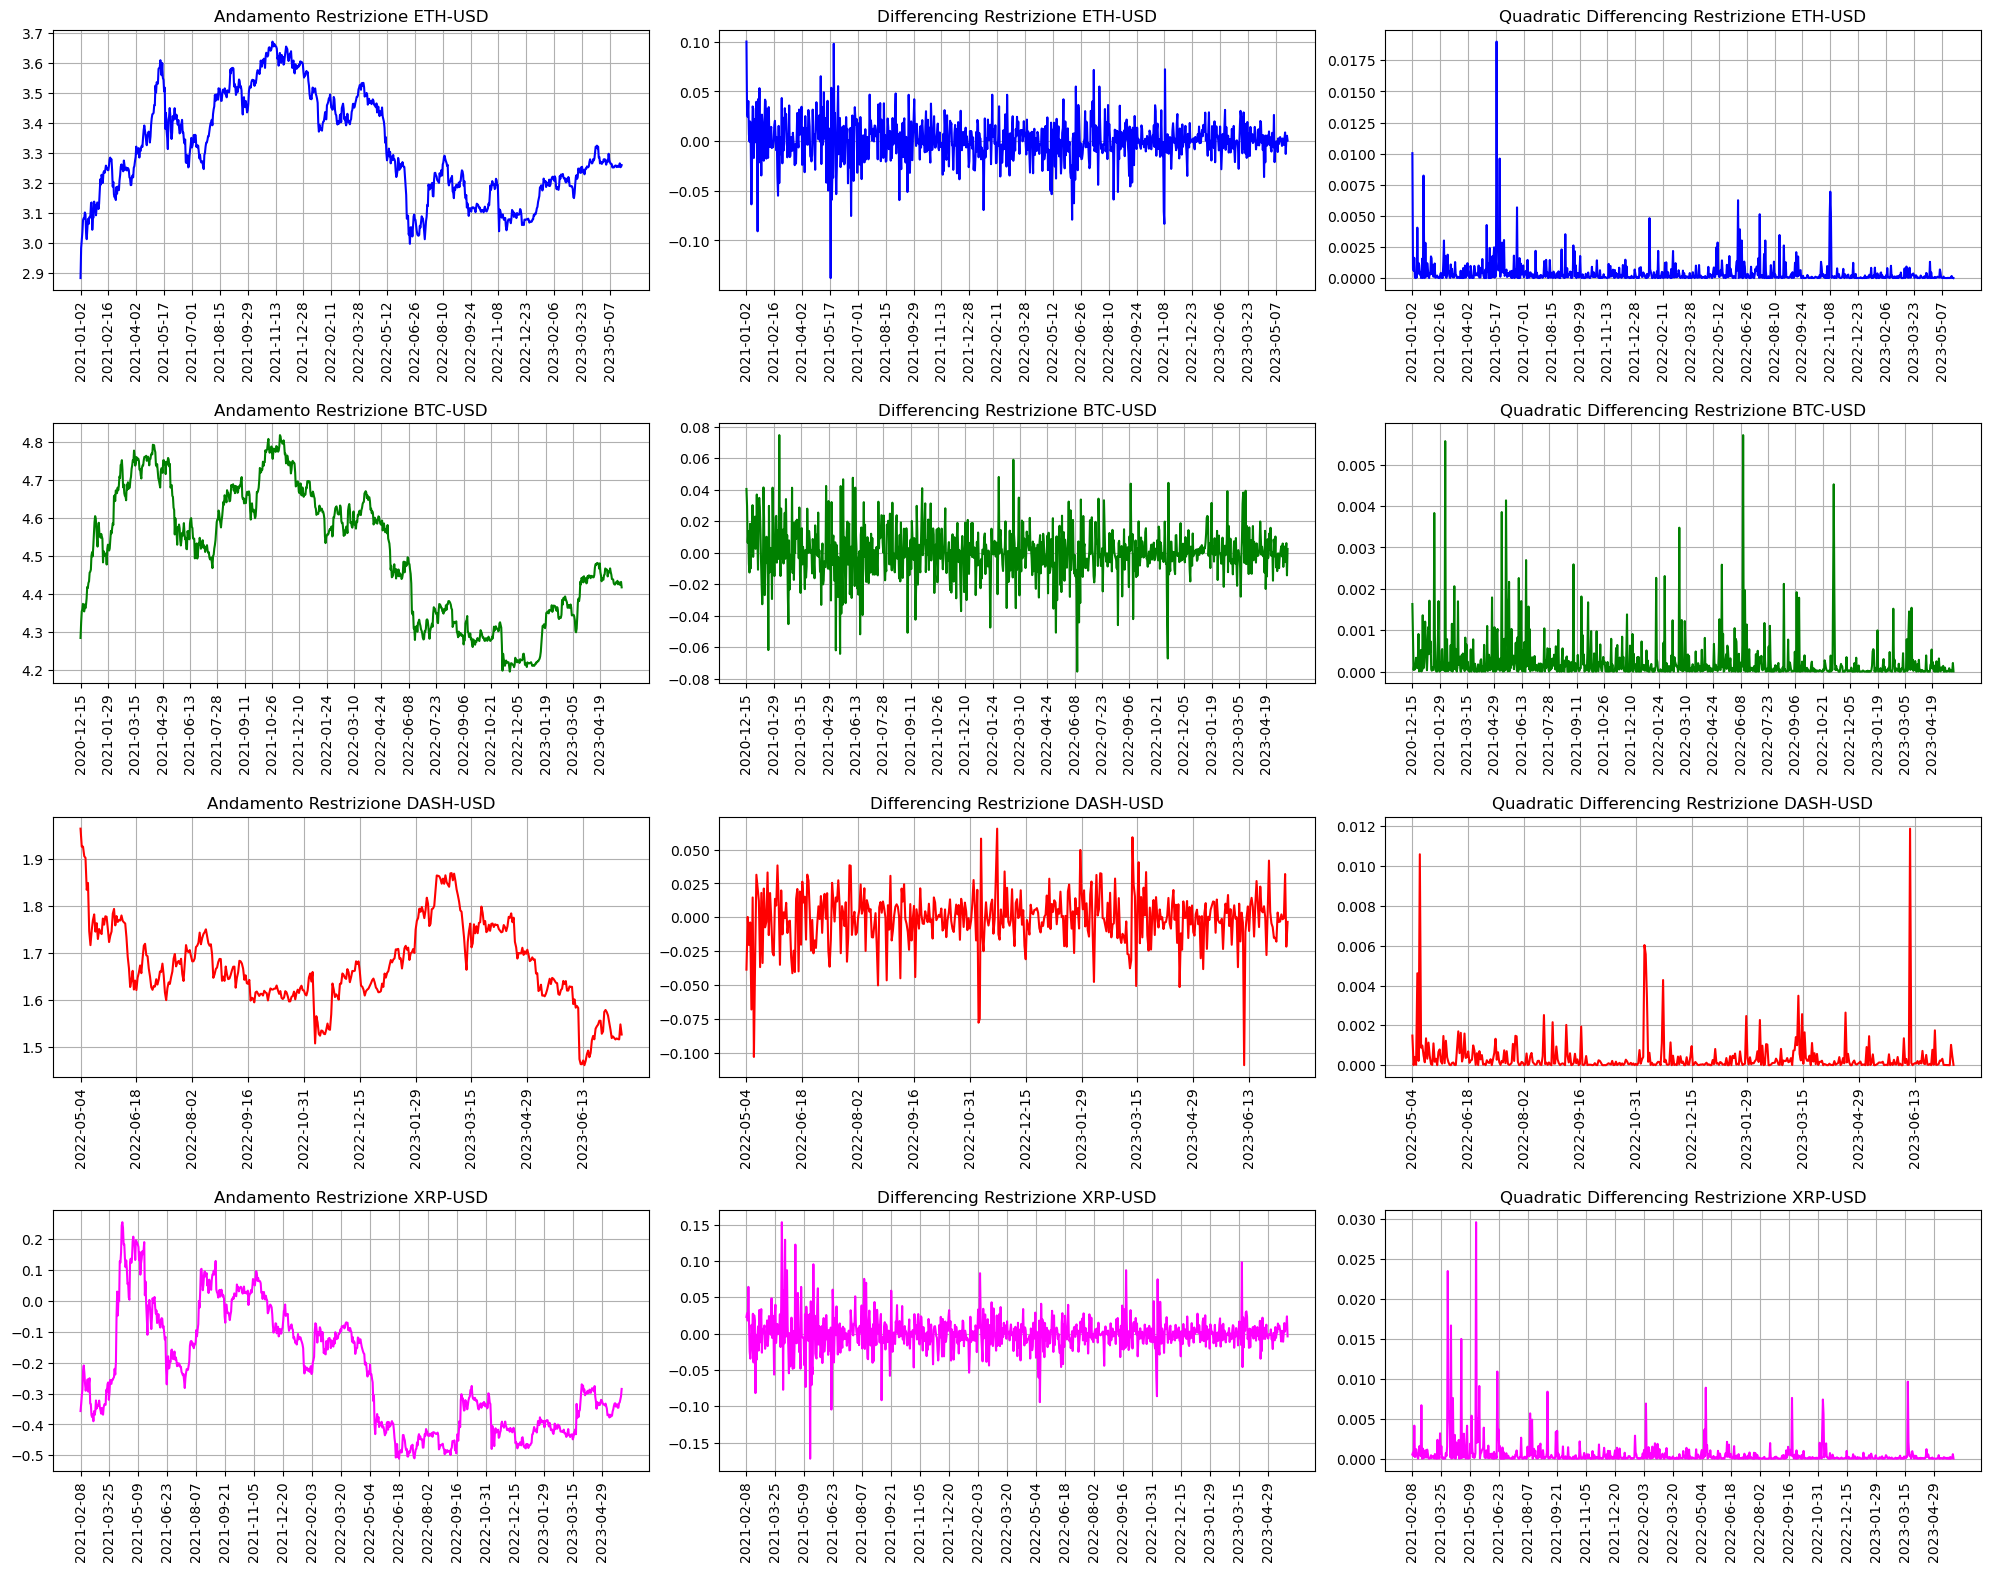

<Figure size 640x480 with 0 Axes>

In [30]:

figure, axs = plt.subplots(nrows = len(cryptoList), ncols = 3, figsize = (20,15))
figure.tight_layout(h_pad = 7.5, w_pad = 2)

STEP = 45
ROTATION = 90

i = 0 
for crypto in cryptoList :
    axs[i][0].plot(trainCryptoDict[crypto]["LogClosePrice"], color = colors[i % len(colors)])
    axs[i][0].set_title("Andamento Restrizione " + crypto)
    axs[i][0].grid(True)

    xtickPoints = np.arange(start = 0, stop = trainCryptoDict[crypto].shape[0], step = STEP)
    xtickLabels = trainCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[i][0].set_xticks(xtickPoints)
    axs[i][0].set_xticklabels(xtickLabels, rotation = ROTATION)

    i += 1

i = 0 
for crypto in cryptoList :
    axs[i][1].plot(trainCryptoDiffDict[crypto]["Diff"], color = colors[i % len(colors)])
    axs[i][1].set_title("Differencing Restrizione " + crypto)
    axs[i][1].grid(True)

    xtickPoints = np.arange(start = 0, stop = trainCryptoDict[crypto].shape[0], step = STEP)
    xtickLabels = trainCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[i][1].set_xticks(xtickPoints)
    axs[i][1].set_xticklabels(xtickLabels, rotation = ROTATION)

    i += 1

i = 0 
for crypto in cryptoList :
    axs[i][2].plot(trainCryptoDiffDict[crypto]["QuadDiff"], color = colors[i % len(colors)])
    axs[i][2].set_title("Quadratic Differencing Restrizione " + crypto)
    axs[i][2].grid(True)

    xtickPoints = np.arange(start = 0, stop = trainCryptoDict[crypto].shape[0], step = STEP)
    xtickLabels = trainCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[i][2].set_xticks(xtickPoints)
    axs[i][2].set_xticklabels(xtickLabels, rotation = ROTATION)

    i += 1

plt.show()
plt.clf()

#### 4.1] Analisi del differencing ridotto
Come nel primo caso analizziamo il differencing e vediamo se questo ha natura di white noise.

##### 4.1.1] Analisi Stazionarietà
Per l'analisi di stazionarietà eseguiamo due test:
* KDSS
* Adfuller

Nel test di KPSS abbiamo:
* *H0* : La serie è stazionaria attorno a una tendenza deterministica
* *H1* : La serie non è stazionaria

Nel test di Adfuller abbiamo:
* *H0* : La serie ha una radice unitaria
* *H1* : La serie non ha una radice unitaria

Nel nostro caso vogliamo:
* KPSS, **Accettare**
* Adfuller, **Rigettare**

In [31]:
kpss_test(trainCryptoDiffDict, "Diff", cryptoList)
adf_test(trainCryptoDiffDict, "Diff", cryptoList)

                        KPSS                         
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.30402339982507376 │    0.1 │ Accept  │
│ BTC-USD  │ 0.26793706713609056 │    0.1 │ Accept  │
│ DASH-USD │ 0.14448487432870857 │    0.1 │ Accept  │
│ XRP-USD  │ 0.10857489114721602 │    0.1 │ Accept  │
└──────────┴─────────────────────┴────────┴─────────┘

                                ADF                                 
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ -31.463043189797844 │                   0.0 │ Reject  │
│ BTC-USD  │ -30.483765580661746 │                   0.0 │ Reject  │
│ DASH-USD │ -15.051422863190458 │ 9.281783031352217e-28 │ Reject  │
│ XRP-USD  │ -31.024464015415518 │                   0.0 │ Reject  │
└──────────┴─────────────────────┴───────────────────────┴─────────┘

##### 4.1.2] Analisi Eteroschedasticità
Per l'analisi di eteroschedasticità eseguiamo i seguenti test:
* Breusch-Pagan
* White

Nel test di Breusch-Pagan abbiamo:
* $H_0$: I residui sono distribuiti con varianza omogenea (La serie è Omoschedastica)
* $H_1$: I residui *NON* sono distribuiti con varianza omogenea (La serie *NON* è omoschedastica)

Nel test di White abbiamo:
* $H_0$: La varianza dei residui è costante (La serie è Omoschedastica)
* $H_1$: La varianza dei residui *NON* è costante (La serie *NON* è Omoschedastica)

In questo caso vogliamo:
* Breusch-Pagan, **Accettare**
* White, **Accettare**

In [32]:
breusch_pagan_test(trainCryptoDiffDict, "Diff", cryptoList)
white_test(trainCryptoDiffDict, "Diff", cryptoList)

                           Breusch-Pagan                           
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃         StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 25.05566267671057 │  6.737702332420841e-07 │ Reject  │
│ BTC-USD  │ 25.84501763683427 │ 4.5114279068198483e-07 │ Reject  │
│ DASH-USD │ 2.495168564366106 │    0.11492299248948996 │ Accept  │
│ XRP-USD  │  34.8344311264828 │  5.204886672228533e-09 │ Reject  │
└──────────┴───────────────────┴────────────────────────┴─────────┘

                              White                               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃         StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  13.1651660977433 │  2.32843202022156e-06 │ Reject  │
│ BTC-USD  │ 13.22301453319326 │ 2.193663541133534e-06 │ Reject  │
│ DASH-USD │ 3.299977334208391 │  0.037811687468737934 │ Reject  │
│ XRP-USD  │ 23.00017453495107 │ 1.885248700990853e-10 │ Reject  │
└──────────┴───────────────────┴───────────────────────┴─────────┘

##### 4.1.3] Analisi Autocorrelazione
Per l'Autocorrelazione consideriamo i seguenti test:
* Ljung-Box

Per il test Ljung-Box:
* $H_0$: Non c'è autocorrelazione nei dati. In altre parole, i residui sono indipendenti l'uno dall'altro e non mostrano alcuna struttura di autocorrelazione significativa.
* $H_1$: I residui non sono indipendenti e mostrano una struttura di autocorrelazione significativa.

Vogliamo quindi :
* Ljung-Box, **Accettare**

In [33]:
ljung_box_test(trainCryptoDiffDict, "Diff", cryptoList)

                            Ljung-Box                             
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  20.74439638246904 │ 0.022948121087501706 │ Reject  │
│ BTC-USD  │ 12.632829754955273 │  0.24493117060834974 │ Accept  │
│ DASH-USD │  9.348220225953458 │  0.49940562393741117 │ Accept  │
│ XRP-USD  │ 16.883011215521183 │  0.07699305871115295 │ Accept  │
└──────────┴────────────────────┴──────────────────────┴─────────┘

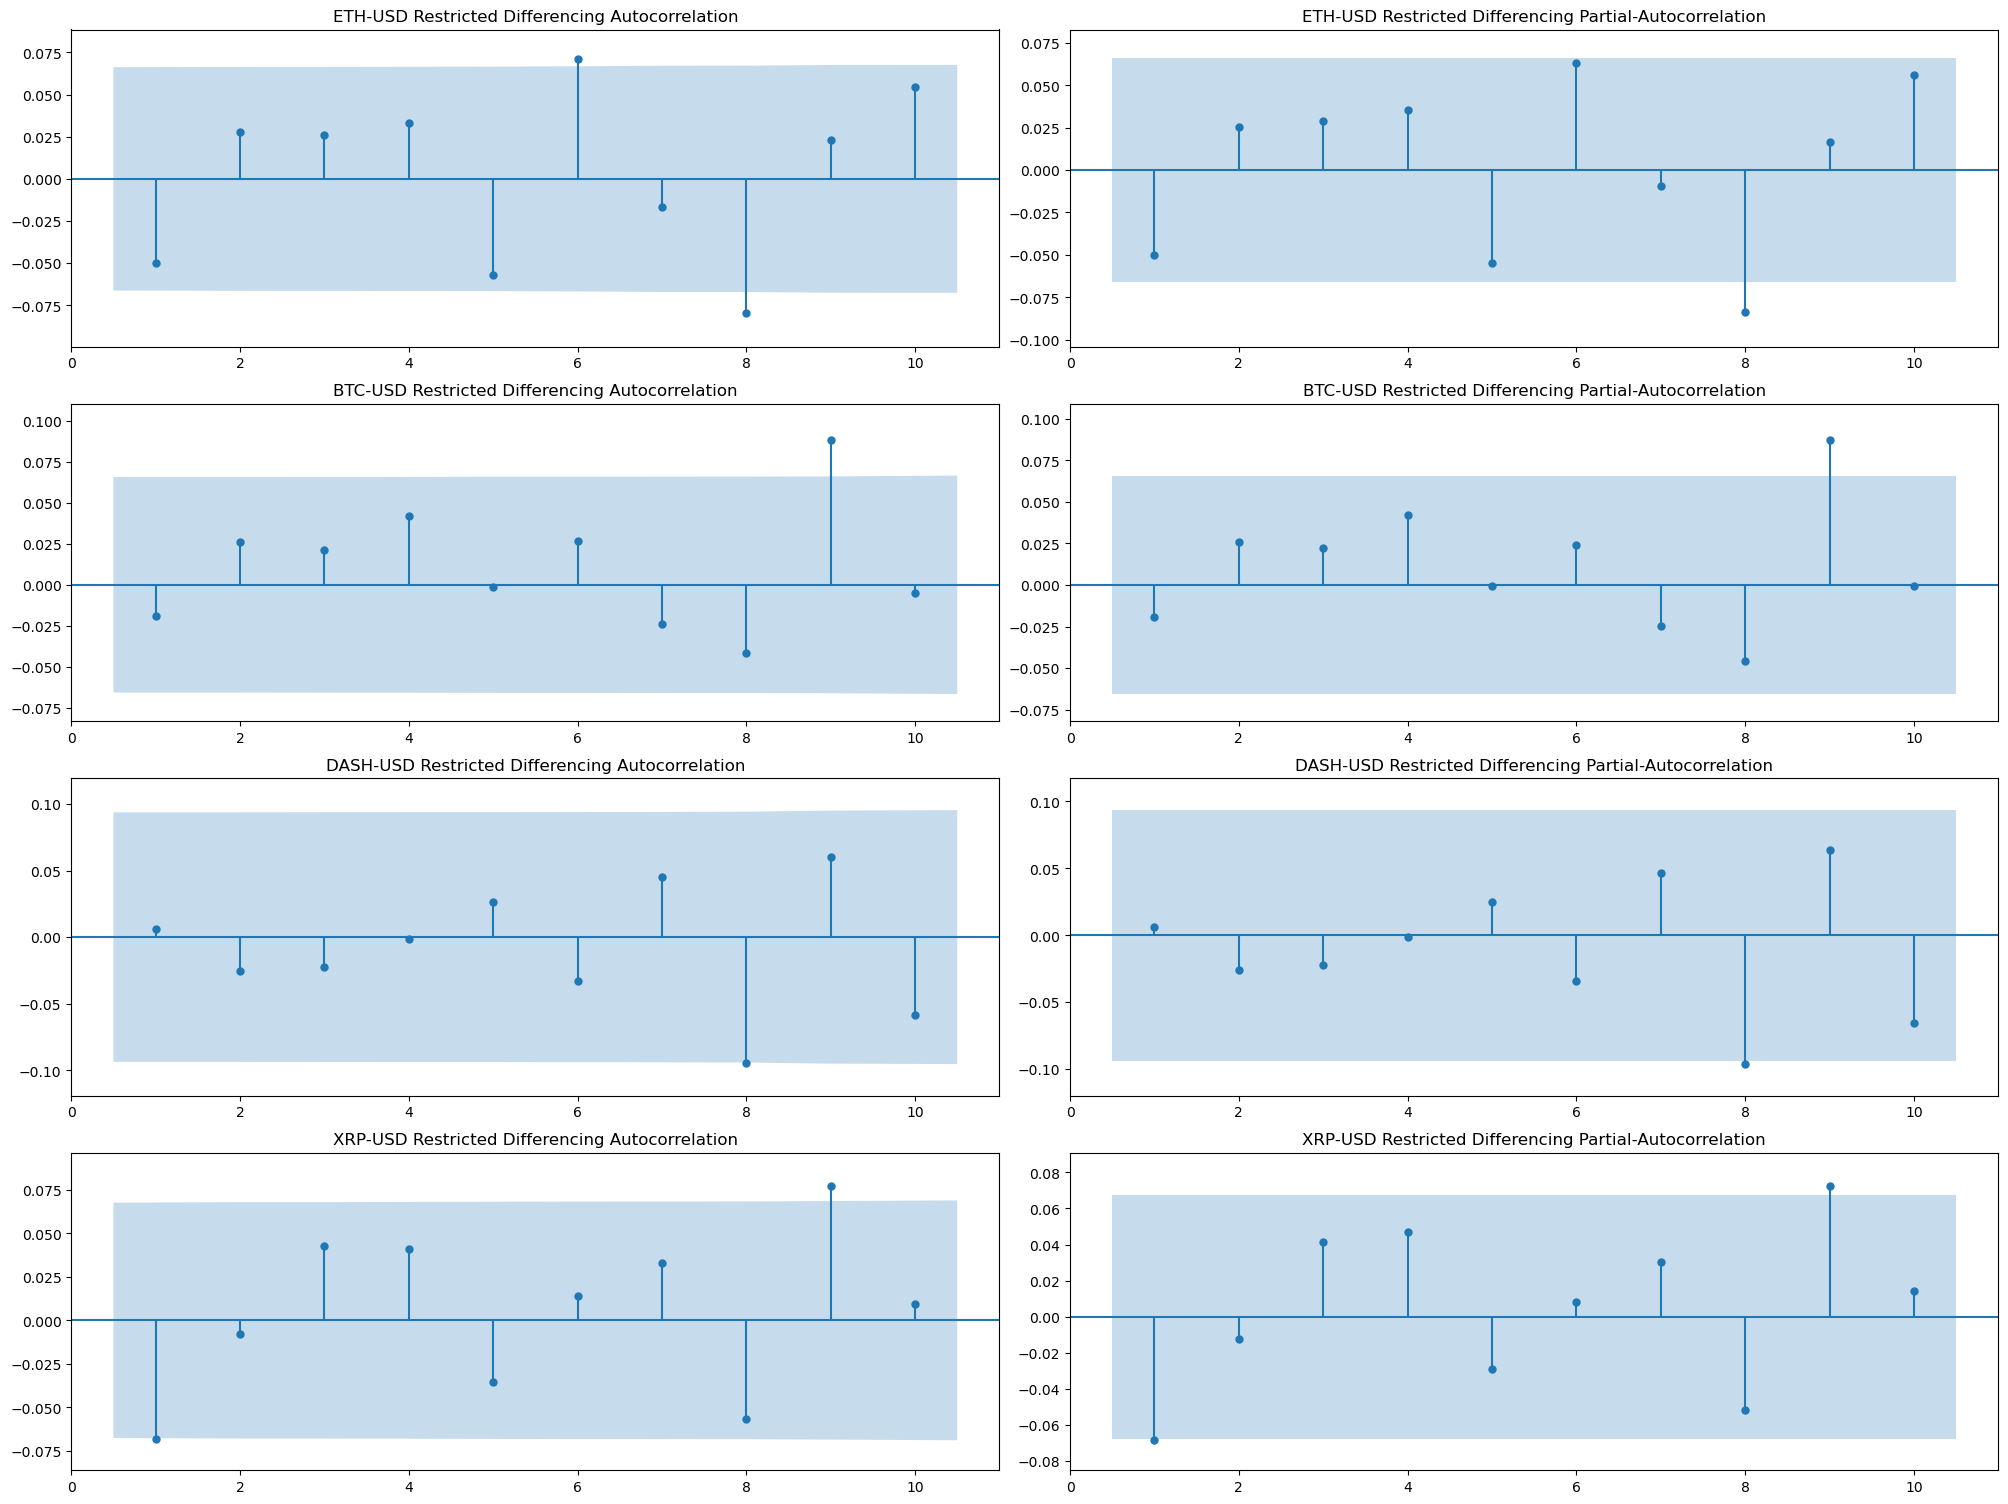

<Figure size 640x480 with 0 Axes>

In [34]:
correlograms(
    trainCryptoDiffDict,
    "Diff",
    cryptoList,
    titleAuto = "Restricted Differencing Autocorrelation",
    titlePartial = "Restricted Differencing Partial-Autocorrelation", 
    zeroAuto = False, yLimsAuto = True,
    zeroPar = False, yLimsPar = True
)

Osserviamo forte correlazione (effetto clustering) e quindi potremmo procedere a modellarli con dei processi GARCH.

##### 4.1.4] Analisi Normalità
Per l'analisi di normalità eseguiamo i seguenti test:
* Shapiro-Wilk
* Kolmogorov-Smirnov

Nel test di Shapiro-Wilk abbiamo:
* $H_0$: I dati seguono una distribuzione normale
* $H_1$: I dati NON seguono una distribuzione normale

Nel test di Kolmogorov-Smirnov abbiamo:
* $H_0$: I dati seguono la distribuzione specificata
* $H_1$: I dati NON seguono la distribuzione specificata

Nel nostro caso vogliamo:
* Shapiro-Wilk, **Accettare**
* Kolmogorov-Smirnov, **Accettare**

In [35]:
shapiro_wilk(trainCryptoDiffDict, "Diff", cryptoList)
kolmogorov_smirnov(trainCryptoDiffDict, "Diff", cryptoList)

                            Shapiro-Wilk                            
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.9502420425415039 │ 1.3270286513620812e-16 │ Reject  │
│ BTC-USD  │ 0.9572618007659912 │  1.919576134737323e-15 │ Reject  │
│ DASH-USD │  0.939193844795227 │ 2.2313227654446877e-12 │ Reject  │
│ XRP-USD  │ 0.8953757286071777 │ 1.7658039207309898e-23 │ Reject  │
└──────────┴────────────────────┴────────────────────────┴─────────┘

                          Kolmogorov-Smirnov                          
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃                  pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.47223125234355756 │ 1.3485745072511574e-179 │ Reject  │
│ BTC-USD  │  0.4785933494051804 │ 3.9304122976977064e-188 │ Reject  │
│ DASH-USD │  0.4741664051569694 │   9.750037391596386e-91 │ Reject  │
│ XRP-USD  │ 0.46522174716623627 │ 1.8352320088248526e-167 │ Reject  │
└──────────┴─────────────────────┴─────────────────────────┴─────────┘

## 5] Quadratic autocorrelation

Analizziamo l'autocorrelazione dei quadrati: osservando i grafici possiamo infatti notare come a periodi di alta volatilità seguano periodi di alta volatilità e come a periodi di bassa volatilità seguano periodi di bassa volatilità. Questo ci fa supporre la presenza di una autocorrelazione nella serie delle varianze.

Ricordando che:

$D^{2}[X_t] = E[X_t^{2}] + E^{2}[X_t]$

Se la media fosse nulla quindi la varianza dei rendimenti corrisponderebbe con il quadrato dei rendimenti stessi:

$D^{2}[X_t] = E[X_t^{2}]$

In [36]:
#TODO media nulla -> interessante (indice di mercato efficiente) (BTC prof)
# Ipotesi nulla: la media è zero
null_hypothesis_mean = 0
alpha = 0.05
meanTable = buildTable("Zero Mean Test", ["Crypto", "T-Statistic", "P-Value", "Result"], ["left", "right", "right", "left"])
for crypto in cryptoList:
    # Esegue il test t
    t_statistic, p_value = ttest_1samp(differencingDict[crypto]["Diff"], null_hypothesis_mean)

    # Confronta il p-value con un livello di significatività predefinito (ad esempio, 0.05)
    outcomeString = "Reject" if p_value < alpha else "Accept"
    meanTable.add_row(crypto, str(t_statistic), str(p_value), outcomeString)
# Stampa i risultati del test
console = Console()
console.print(meanTable)

                         Zero Mean Test                          
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Crypto   ┃         T-Statistic ┃             P-Value ┃ Result ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ ETH-USD  │ 0.33808066325759595 │  0.7353367184851297 │ Accept │
│ BTC-USD  │  0.3725821323911949 │  0.7094976528285228 │ Accept │
│ DASH-USD │  -1.459006273766798 │ 0.14471524793122822 │ Accept │
│ XRP-USD  │ -0.5918757465602607 │  0.5539984936921993 │ Accept │
└──────────┴─────────────────────┴─────────────────────┴────────┘

Per nessuno degli strumenti finanziari possiamo rigettare l'ipotesi nulla di *media nulla* al 95%.

Procediamo quindi con l'analisi dei rendimenti logaritmici quadrati.
Analizziamo l'eventuale presenza di autocorrelazione con il test di *Ljung-Box*.

In [37]:
ljung_box_test(trainCryptoDiffDict, "QuadDiff", cryptoList)

                             Ljung-Box                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 107.45662340504884 │ 1.7362744278257656e-18 │ Reject  │
│ BTC-USD  │ 28.435878927917237 │  0.0015366636984585028 │ Reject  │
│ DASH-USD │ 20.296369471575147 │   0.026570915198950266 │ Reject  │
│ XRP-USD  │ 124.35893071112875 │  6.585066550321394e-22 │ Reject  │
└──────────┴────────────────────┴────────────────────────┴─────────┘

Dai risultati si evince che per tutte le monete si può rigettare l'ipotesi nulla di *non-autocorrelazione*, concludiamo quindi che tutte le monete presentano autocorrelazione.

Procediamo a graficare quindi gli autocorrelogrammi per le varie monete.

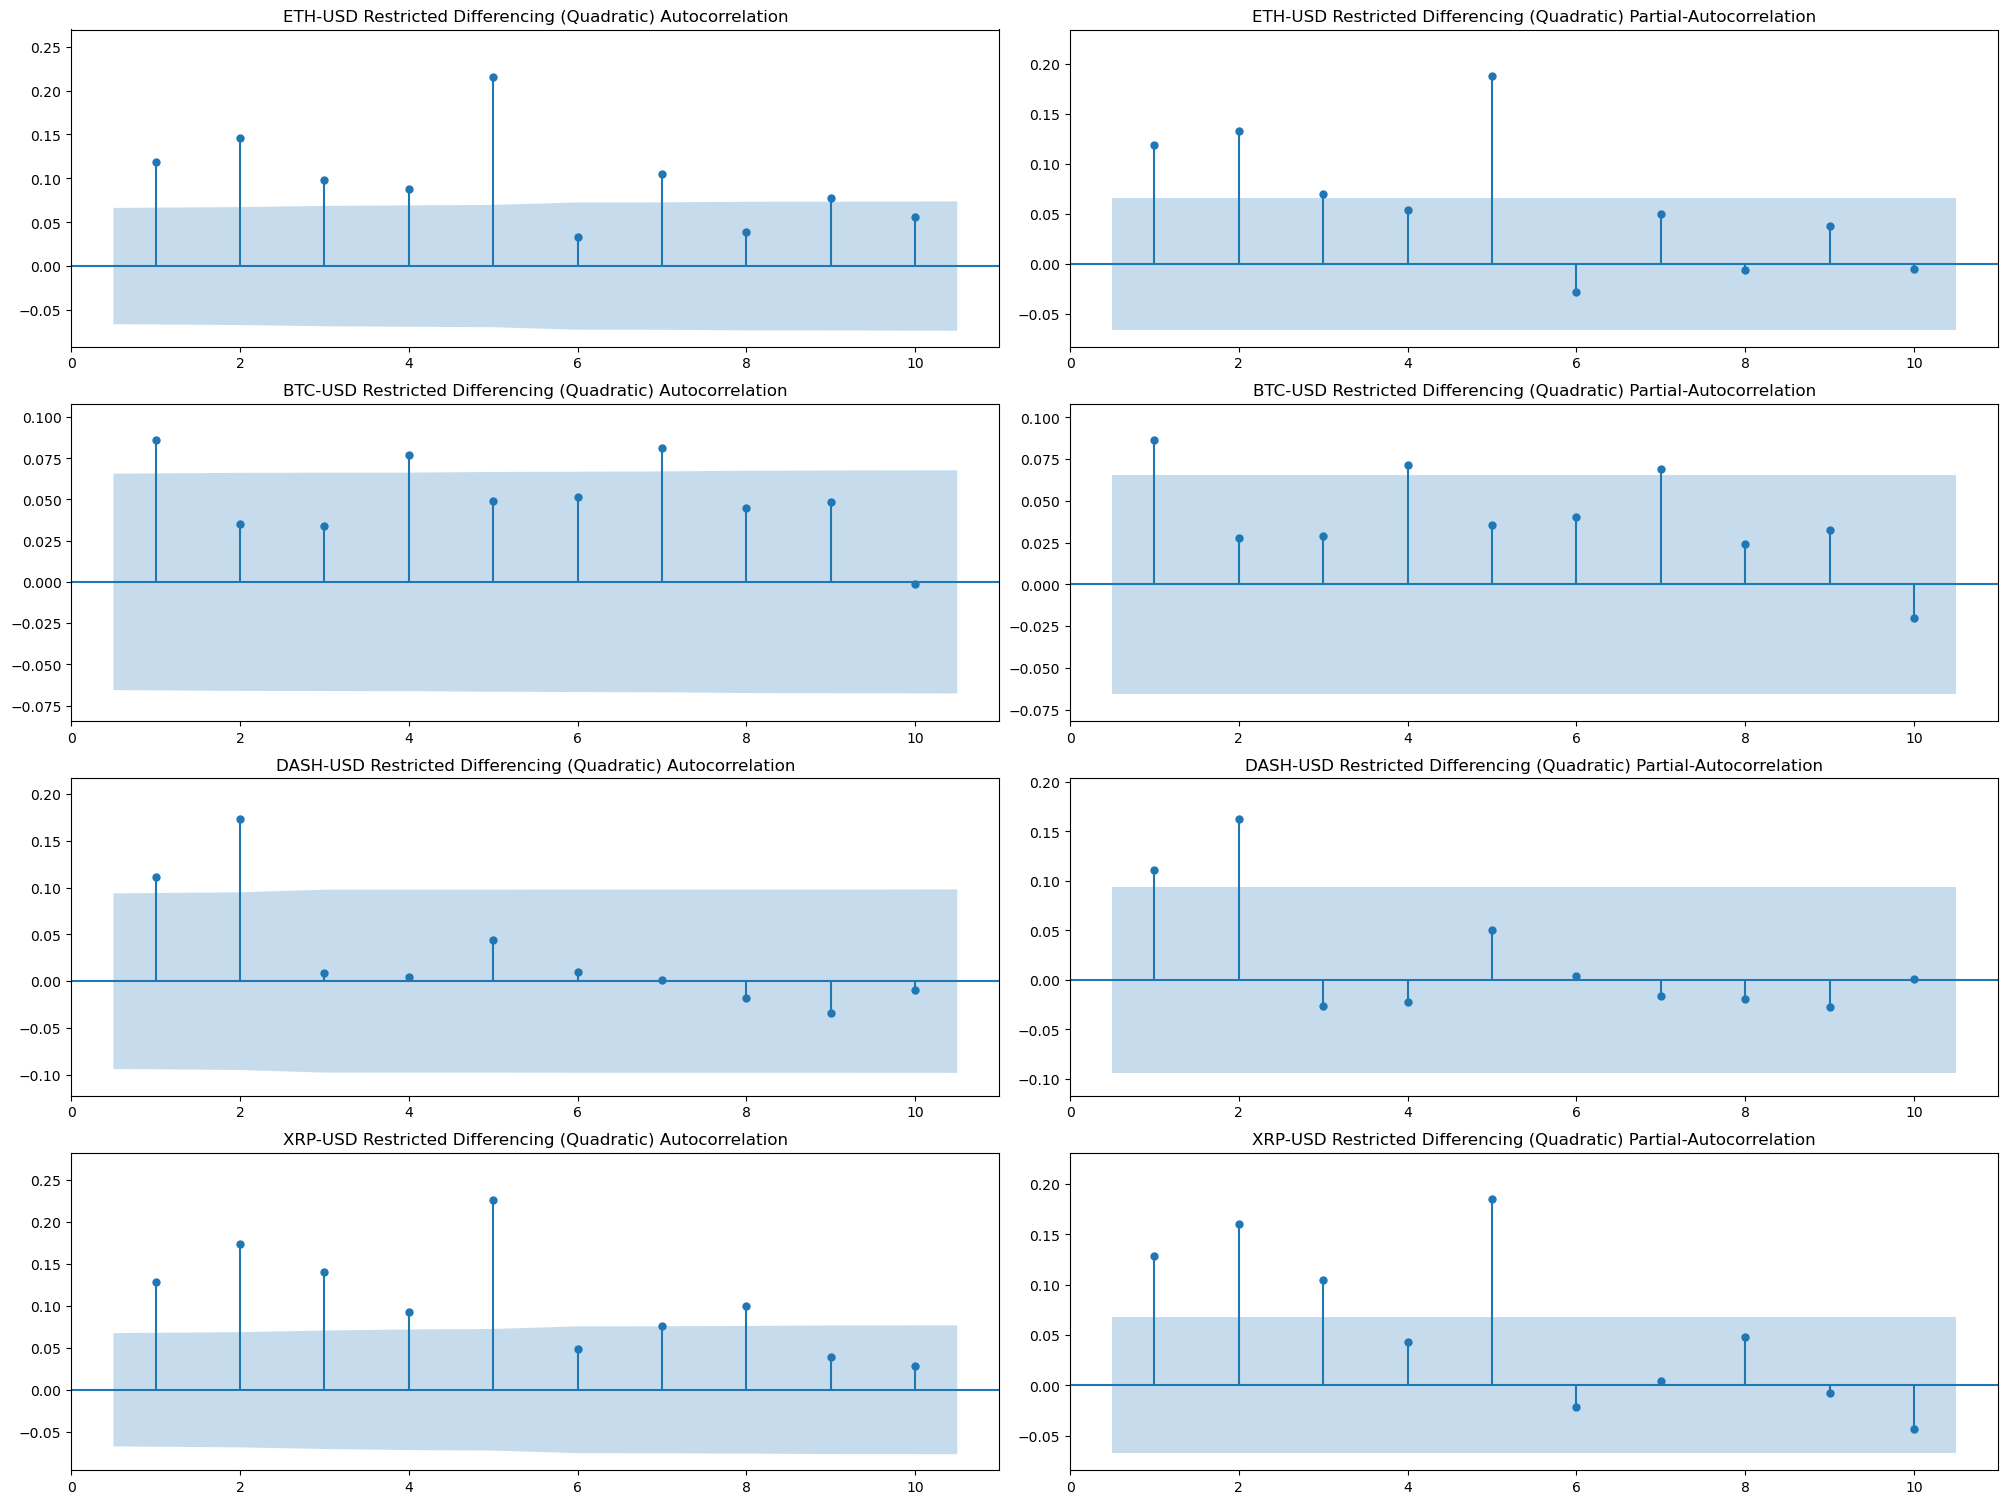

<Figure size 640x480 with 0 Axes>

In [38]:
correlograms(
    trainCryptoDiffDict, 
    "QuadDiff", 
    cryptoList,
    titleAuto = "Restricted Differencing (Quadratic) Autocorrelation",
    titlePartial = "Restricted Differencing (Quadratic) Partial-Autocorrelation",
    zeroAuto = False, zeroPar = False,
    yLimsAuto = True, yLimsPar = True
)

## 6] Analisi con modello GARCH

Essendo presente autocorrelazione nella volatilità dei rendimenti possiamo procedere a modellarla tramite un *Generalized ARCH model (GARCH)*.

Nel modello GARCH ...In practice, only rather rich ARCH parameterizations are able to ﬁt ﬁnancial series adequately
However, largely parameterized models can be unstable in forecasting and a hard to estimate
In order to overcome the shortcomings of the ARCH, Tim Bollerslev proposed a generalisation of the ARCH model called GARCH (Bollerslev, 1986)
The model allows to ﬁt ﬁnancial returns adequately while keeping the number of parameters small
In practice, the GARCH model is one of the most successfully employed volatility models

(da pag 63 a 110 circa)

In [39]:
residualsDict : {str, pd.DataFrame} = {}

r['source']('./R/R_Scripts.R')
garchResiduals_R = robjects.globalenv['garchResiduals']

for crypto in cryptoList :
    tempCryptoDiff = trainCryptoDiffDict[crypto]["Diff"].copy()
    #tempCryptoDiff = differencingDict[crypto]["Diff"].copy()
    model = arch_model(tempCryptoDiff)
    fittedModel = model.fit(disp='off')  # Setting disp to 'off' to suppress convergence messages
    console.print(crypto + "\n" + str(fittedModel.summary()))

    diffList_R = pandas2ri.py2rpy(tempCryptoDiff)
    residuals_R = garchResiduals_R(diffList_R)
    residuals = pd.Series(list(residuals_R)[1 : ]).dropna()

    diff = residuals - fittedModel.resid

    residualsDict[crypto] = pd.DataFrame(data = {"Resid" : residuals})

ETH-USD
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2214.67
Distribution:                  Normal   AIC:                          -4421.35
Method:            Maximum Likelihood   BIC:                          -4402.25
                                        No. Observations:                  875
Date:                Wed, Dec 13 2023   Df Residuals:                      874
Time:                        15:54:33   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.1548e-04  5.980e-04      0.862      0.389 [-6.566e-04,1.688e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      8.7622e-06  3.227e-11  2.715e+05      0.000 [8.762e-06,8.762e-06]
alpha[1]       0.0999  3.855e-02      2.592  9.552e-03   [2.435e-02,  0.175]
beta[1]        0.8801  3.175e-02     27.722 3.824e-169     [  0.818,  0.942]
============================================================================

Covariance estimator: robust


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     3.927254e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -2.964e+03
     1    7 -2.964e+03  1.76e-04  2.76e-04  1.6e-04  3.4e+09  1.6e-05  4.66e+05
     2    8 -2.965e+03  1.17e-05  1.29e-05  1.4e-04  2.0e+00  1.6e-05  1.27e+00
     3   15 -2.967e+03  8.08e-04  1.17e-03  2.8e-01  2.0e+00  4.0e-02  1.26e+00
     4   18 -2.975e+03  2.58e-03  7.88e-03  8.4e-01  1.9e+00  6.4e-01  2.74e-01
     5   30 -2.999e+03  8.07e-03  5.29e-02  3.9e-05  4.0e+00  5.4e-05  9.59e-02
     6   36 -3.005e+03  1.98e-03  1.48e-03  9.8e-03  1.8e+00  1.4e-02  1.33e-02
     7   37 -3.005e+03  1.83e-04  2.71e-03  9.9e-03  1.9e+00  1.4e-02  1.23e-02
     8   38 -3.010e+03  1.40e-03  2.52e-03  4.7e-03  1.9e+00  6.8e-03  2.72e-03
     9   41 -3.012e+03  6.81e-04  8.80e-04  5.4e-02 

     3    8.785455e-01     1.000e+00    -1.044e-03



BTC-USD
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2457.09
Distribution:                  Normal   AIC:                          -4906.17
Method:            Maximum Likelihood   BIC:                          -4887.00
                                        No. Observations:                  891
Date:                Wed, Dec 13 2023   Df Residuals:                      890
Time:                        15:54:33   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.5056e-04  4.904e-04      0.307      0.759 [-8.106e-04,1.112e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.2742e-06  1.534e-13  3.437e+07      0.000 [5.274e-06,5.274e-06]
alpha[1]       0.0500  8.641e-04     57.854      0.000 [4.830e-02,5.169e-02]
beta[1]        0.9298  5.429e-03    171.285      0.000     [  0.919,  0.940]
============================================================================

Covariance estimator: robust


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     2.265060e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -3.251e+03
     1    8 -3.251e+03  2.80e-05  5.41e-05  4.7e-05  8.0e+09  4.7e-06  2.16e+05
     2   16 -3.253e+03  3.53e-04  6.39e-04  2.9e-01  2.0e+00  4.1e-02  4.05e-01
     3   20 -3.263e+03  3.10e-03  9.22e-04  8.6e-01  6.0e-01  6.5e-01  3.78e-03
     4   28 -3.264e+03  3.85e-04  8.48e-04  3.7e-06  1.4e+01  5.2e-06  2.26e+00
     5   29 -3.264e+03  2.18e-06  1.92e-06  3.7e-06  2.0e+00  5.2e-06  4.51e+00
     6   30 -3.264e+03  1.28e-07  1.32e-07  3.7e-06  2.0e+00  5.2e-06  4.63e+00
     7   39 -3.269e+03  1.55e-03  1.37e-03  5.7e-02  2.0e+00  8.5e-02  4.62e+00
     8   41 -3.270e+03  3.03e-04  3.27e-04  1.1e-02  2.0e+00  1.7e-02  5.85e+01
     9   42 -3.271e+03  1.87e-04  3.03e-04  1.1e-02 

DASH-USD
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1111.64
Distribution:                  Normal   AIC:                          -2215.28
Method:            Maximum Likelihood   BIC:                          -2198.96
                                        No. Observations:                  437
Date:                Wed, Dec 13 2023   Df Residuals:                      436
Time:                        15:54:33   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.4232e-04  8.411e-04     -0.764      0.445 [-2.291e-03,1.006e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      5.7952e-05  1.155e-05      5.017  5.237e-07 [3.531e-05,8.059e-05]
alpha[1]       0.1076  6.875e-02      1.565      0.117  [-2.712e-02,  0.242]
beta[1]        0.7379  7.224e-02     10.215  1.697e-24     [  0.596,  0.880]
============================================================================

Covariance estimator: robust


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     3.508099e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -1.499e+03
     1    7 -1.499e+03  7.94e-05  1.32e-04  1.0e-04  2.0e+09  1.0e-05  1.30e+05
     2    8 -1.499e+03  3.23e-06  3.54e-06  9.5e-05  2.0e+00  1.0e-05  8.66e-01
     3   15 -1.501e+03  9.78e-04  1.39e-03  2.9e-01  2.0e+00  4.1e-02  8.63e-01
     4   18 -1.505e+03  2.42e-03  2.42e-03  5.8e-01  1.9e+00  1.6e-01  2.04e-01
     5   19 -1.508e+03  2.14e-03  4.26e-03  4.2e-01  1.3e+00  3.3e-01  1.58e-02
     6   27 -1.508e+03  3.83e-04  8.03e-04  1.1e-05  5.3e+00  1.2e-05  2.13e-03
     7   28 -1.508e+03  3.48e-06  2.55e-06  9.5e-06  2.0e+00  1.2e-05  1.44e-04
     8   35 -1.508e+03  8.90e-05  1.11e-04  2.3e-02  5.2e-01  2.8e-02  1.34e-04
     9   37 -1.509e+03  1.68e-04  1.04e-04  2.8e-02 

XRP-USD
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2047.80
Distribution:                  Normal   AIC:                          -4087.60
Method:            Maximum Likelihood   BIC:                          -4068.65
                                        No. Observations:                  842
Date:                Wed, Dec 13 2023   Df Residuals:                      841
Time:                        15:54:33   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.6731e-04  6.177e-04     -0.757      0.449 [-1.678e-03,7.433e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.5062e-05  1.386e-11  1.087e+06      0.000 [1.506e-05,1.506e-05]
alpha[1]       0.1002  4.460e-02      2.247  2.463e-02   [1.281e-02,  0.188]
beta[1]        0.8785  3.225e-02     27.244 1.942e-163     [  0.815,  0.942]
============================================================================

Covariance estimator: robust


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     5.269160e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -2.727e+03
     1    7 -2.728e+03  2.94e-04  4.98e-04  3.0e-04  1.5e+09  3.0e-05  3.84e+05
     2    8 -2.728e+03  8.05e-06  8.84e-06  2.9e-04  2.0e+00  3.0e-05  1.09e+01
     3   15 -2.747e+03  7.08e-03  1.08e-02  5.5e-01  2.0e+00  1.2e-01  1.07e+01
     4   17 -2.763e+03  5.63e-03  5.08e-03  3.0e-01  2.0e+00  1.2e-01  2.49e+00
     5   19 -2.795e+03  1.15e-02  1.13e-02  3.9e-01  2.0e+00  2.4e-01  2.86e+02
     6   21 -2.801e+03  2.26e-03  2.28e-03  5.3e-02  2.0e+00  4.9e-02  5.25e+01
     7   23 -2.817e+03  5.47e-03  9.00e-03  1.8e-01  2.0e+00  2.2e-01  7.28e-01
     8   30 -2.818e+03  3.64e-04  8.98e-04  5.8e-06  1.4e+01  7.7e-06  3.52e-02
     9   31 -2.818e+03  8.77e-06  7.09e-06  5.4e-06 

Per valutare la bontà del modello procediamo con un analisi sui residui. <br>

Valutiamo:
 1. Stazionarietà
 2. Autocorrelazione
 3. Eteroschedasticità

In [40]:
# STAZIONARIETÀ
kpss_test(residualsDict, "Resid", cryptoList)
adf_test(residualsDict, "Resid", cryptoList)

# AUTOCORRELAZIONE
ljung_box_test(residualsDict, "Resid", cryptoList)

# ETEROSCHEDASTICITÀ
breusch_pagan_test(residualsDict, "Resid", cryptoList)
white_test(residualsDict, "Resid", cryptoList)

                        KPSS                         
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.17432400371354975 │    0.1 │ Accept  │
│ BTC-USD  │ 0.19844539579445133 │    0.1 │ Accept  │
│ DASH-USD │ 0.11788575359356059 │    0.1 │ Accept  │
│ XRP-USD  │ 0.10803807541946762 │    0.1 │ Accept  │
└──────────┴─────────────────────┴────────┴─────────┘

                                 ADF                                 
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ -15.693567424856559 │ 1.4241061163949666e-28 │ Reject  │
│ BTC-USD  │ -29.079199700789154 │                    0.0 │ Reject  │
│ DASH-USD │ -20.551692589739947 │                    0.0 │ Reject  │
│ XRP-USD  │ -30.272866468250122 │                    0.0 │ Reject  │
└──────────┴─────────────────────┴────────────────────────┴─────────┘

                            Ljung-Box                            
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃              pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 12.429167305858956 │  0.2573598822424017 │ Accept  │
│ BTC-USD  │ 11.049385706036809 │ 0.35368336960583363 │ Accept  │
│ DASH-USD │  7.738434333520586 │  0.6543690599625923 │ Accept  │
│ XRP-USD  │  13.16396100965736 │ 0.21464853827574287 │ Accept  │
└──────────┴────────────────────┴─────────────────────┴─────────┘

                           Breusch-Pagan                           
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  3.0552372793185714 │   0.0808291850355068 │ Accept  │
│ BTC-USD  │    4.81037750869296 │ 0.028547494279450508 │ Reject  │
│ DASH-USD │ 0.16268201483311248 │   0.6868977927761047 │ Accept  │
│ XRP-USD  │   6.365618133810369 │ 0.011819036032203746 │ Reject  │
└──────────┴─────────────────────┴──────────────────────┴─────────┘

                              White                               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 2.1579503833990525 │  0.11617918995361964 │ Accept  │
│ BTC-USD  │ 2.5589215991266947 │  0.07795936137356213 │ Accept  │
│ DASH-USD │  1.432578207289038 │   0.2398217511979006 │ Accept  │
│ XRP-USD  │ 3.4750426643481562 │ 0.031407409545298644 │ Reject  │
└──────────┴────────────────────┴──────────────────────┴─────────┘

Grafichiamo quindi i residui ottenuti.

<Figure size 1600x900 with 0 Axes>

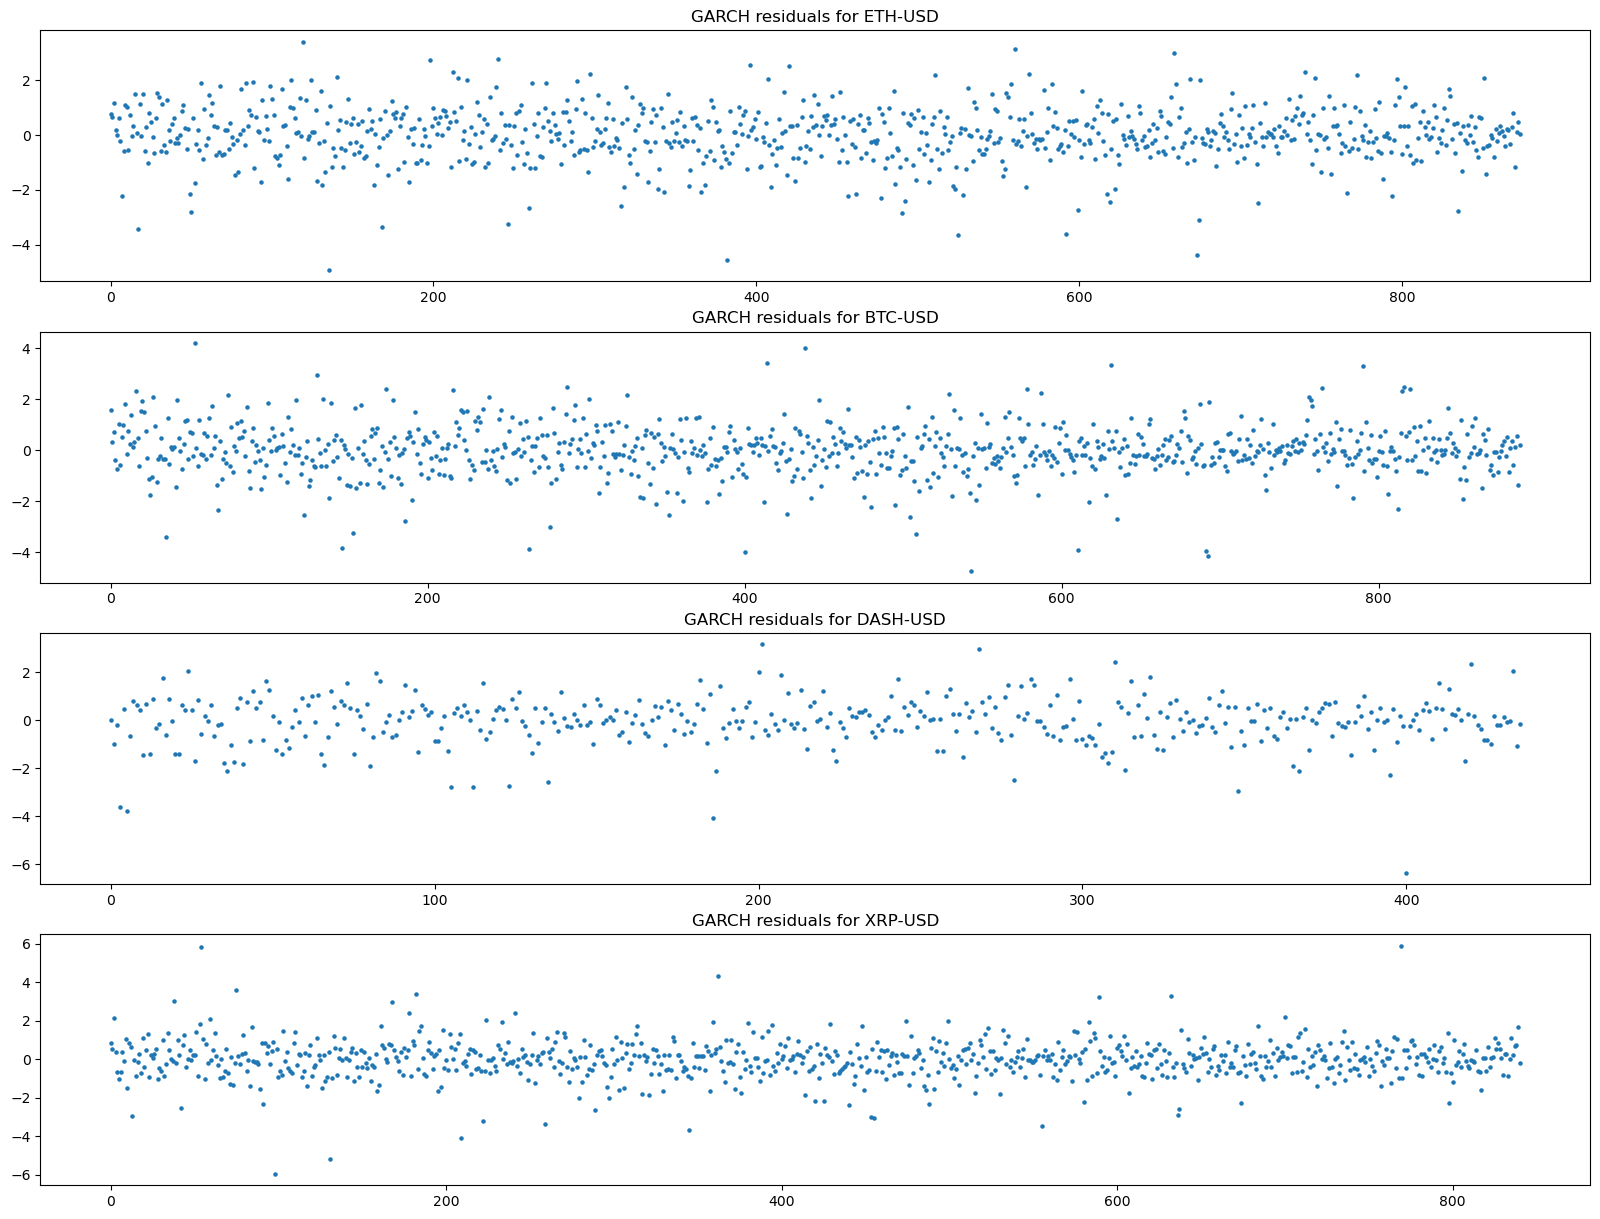

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize= (16,9))
fig, axs = plt.subplots(nrows=len(cryptoList), figsize=(20, 15))
i = 0
for crypto in cryptoList:
    axs[i].scatter(x = np.arange(0, residualsDict[crypto].shape[0]), y = residualsDict[crypto]["Resid"], sizes = [5])
    axs[i].set_title("GARCH residuals for " + crypto)
    i += 1


plt.show()
plt.clf()

Per quanto riguarda l'autocorrelazione andiamo a produrre degli autocorrelogrammi.

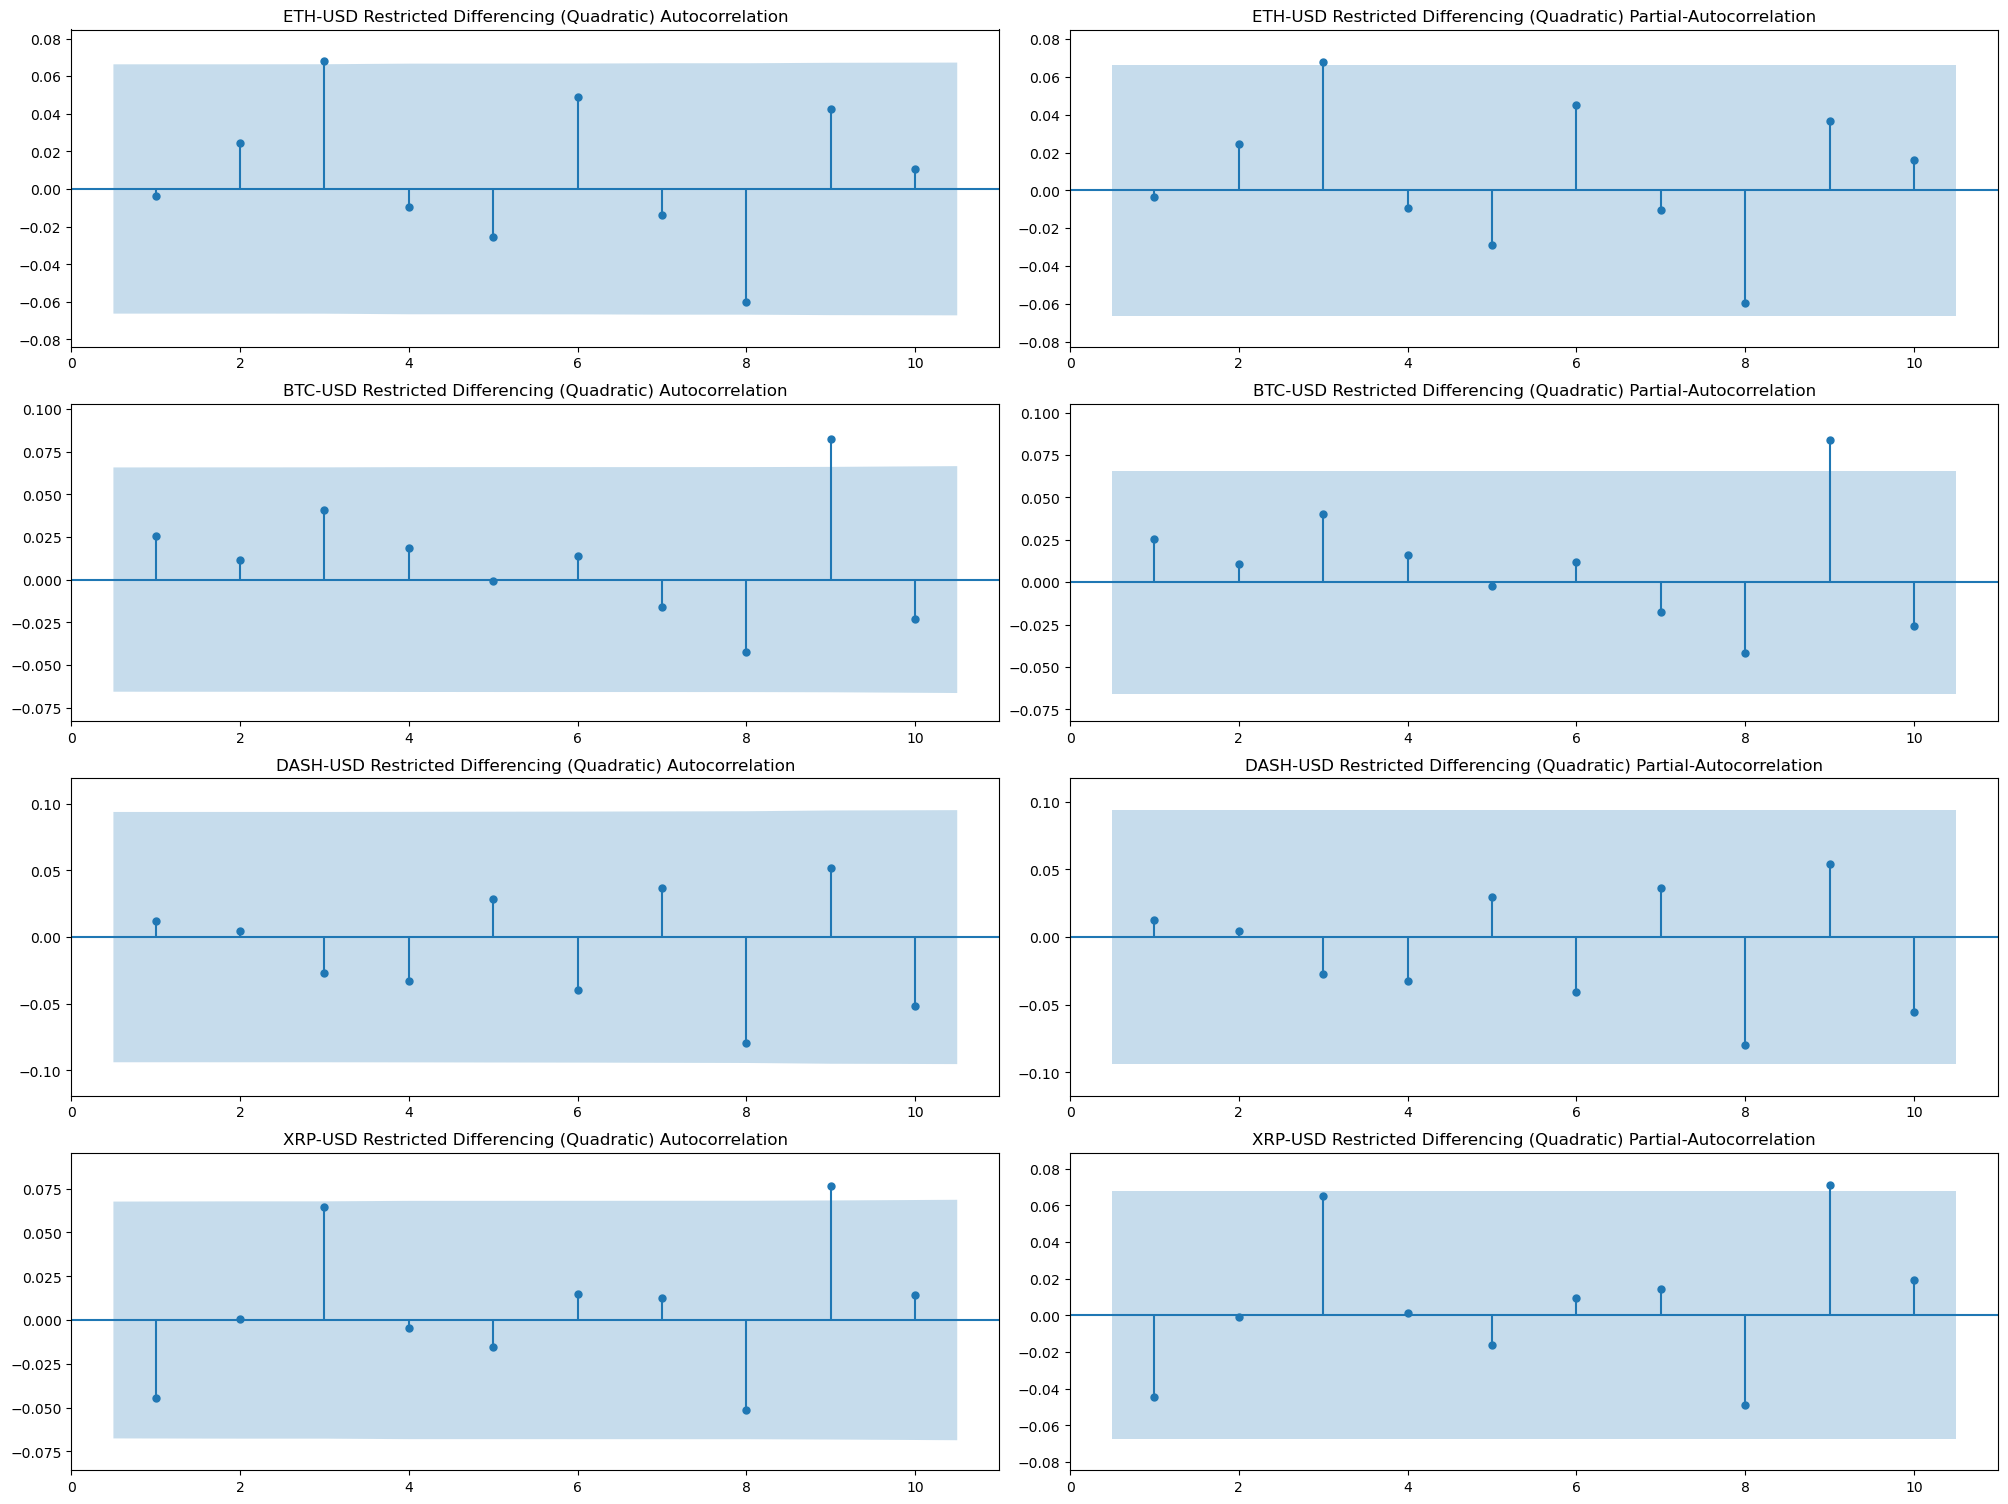

<Figure size 640x480 with 0 Axes>

In [42]:
correlograms(
    residualsDict, 
    "Resid", 
    cryptoList,
    titleAuto = "Restricted Differencing (Quadratic) Autocorrelation",
    titlePartial = "Restricted Differencing (Quadratic) Partial-Autocorrelation",
    zeroAuto = False, zeroPar = False,
    yLimsAuto = True, yLimsPar = True
)

### 6.1] Approccio non parametrico (Tecnica di Bootstrap)

Con l'obiettivo di generare delle bande di predizione in cui ci aspettiamo che ricada il nostro testing set andiamo ad applicare la tecnica di *Bootstrap*.
Questa tecnica, che sembra empiricamente funzionare discretamente bene, è molto facile e veloce rispetto ad un tradizionale approccio parametrico ma non dà informazioni complete sul processo generatore della serie dei residui.

Procediamo quindi con i seguenti passi per ogni cryptovaluta:
 1. Fit del modello *GARCH(1,1)* sul testingSet dei rendimenti
 2. Estrazione dei parametri del modello ($\alpha_0$, $\alpha_1$, $\beta_1$)
 3. Tecnica di Bootstrap:
    - Estrazione di *TESTING_SET_LEN* samples con rimpiazzamento dai residui del modello
    - Generazione di *10000 traiettorie*:
      <br> $\sigma^2_t = \alpha_0 + \alpha_1 X_{t-1}^2 + \beta_1 \sigma_{t-1}^2$
      <br> $X_t = \sigma_t W_t$
      <br> $\forall t = 1,...,testSetLen$
      <br> Dove $\sigma_0, X_0 = lastTrainingSetPoint$
  

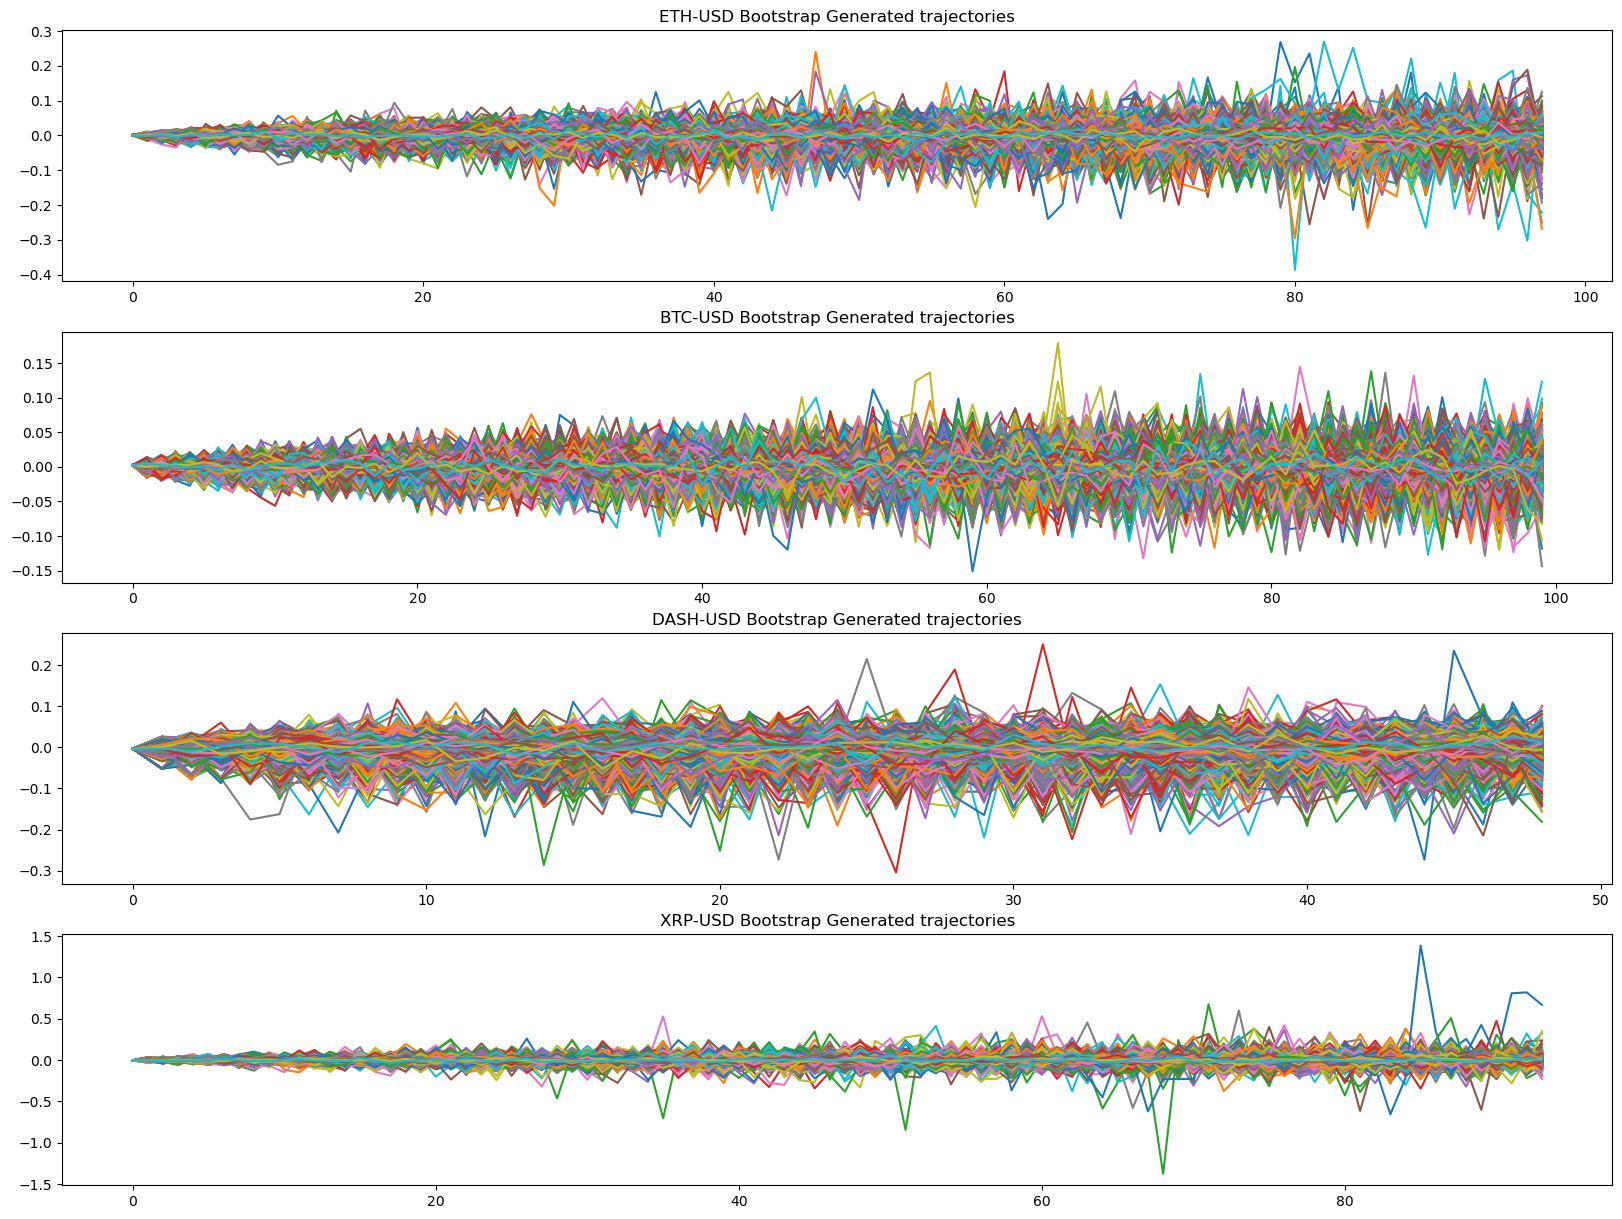

<Figure size 640x480 with 0 Axes>

In [43]:
NUM_SAMPLES = 10000
fig, axs = plt.subplots(nrows = len(cryptoList), ncols = 1, figsize=(20,15))
axsIndex = 0
np.random.seed(NP_RANDOM_SEED)
trajectoriesDict : dict[str, list[list]] = {}

r['source']('./R/R_Scripts.R')
garchResiduals_R = robjects.globalenv['garchResiduals']

for crypto in cryptoList :
    TRAINING_SET_LEN = trainCryptoDiffDict[crypto]["Diff"].shape[0]
    TESTING_SET_LEN = testCryptoDiffDict[crypto]["Diff"].shape[0]
    garchModel = arch_model(trainCryptoDiffDict[crypto]["Diff"])
    fittedModel = garchModel.fit(disp = 'off')
    residuals = residualsDict[crypto]["Resid"]

    alpha_0 = fittedModel.params["omega"]
    alpha_1 = fittedModel.params["alpha[1]"]
    beta_1 = fittedModel.params["beta[1]"]

    sigma_0 = trainCryptoDiffDict[crypto]["Diff"][TRAINING_SET_LEN - 1]
    trajectories = []
    for _ in range(NUM_SAMPLES):
        computedXt = []
        bootstrapSample = np.random.choice(a = residuals, size = TESTING_SET_LEN, replace = True)
        prev_Xt = trainCryptoDiffDict[crypto]["Diff"].iloc[TRAINING_SET_LEN-1]
        computedXt.append(prev_Xt)
        prev_var_t = sigma_0**2
        for i in range(TESTING_SET_LEN):
            var_t = alpha_0 + (alpha_1 * (prev_Xt**2)) + (beta_1 * prev_var_t)
            Xt = np.sqrt(var_t) * bootstrapSample[i]
            computedXt.append(Xt)
            prev_Xt = Xt
            prev_var_t = var_t
        trajectories.append(computedXt)
    trajectoriesDict[crypto] = trajectories

    axs[axsIndex].set_title(crypto + " Bootstrap Generated trajectories")
    for traj in trajectories:
        axs[axsIndex].plot(traj)
    axsIndex += 1

plt.show()
plt.clf()

Partendo dalle traiettorie generate, andiamo a calcolare i quantili empirici per ogni t e costruiamo le nostre bande di predizione al 10% e 90%.

Grafichiamo poi il tutto sui dati di testing effettivi.

In [44]:
LOW_PERC = 0.10
HIGH_PERC = 0.90

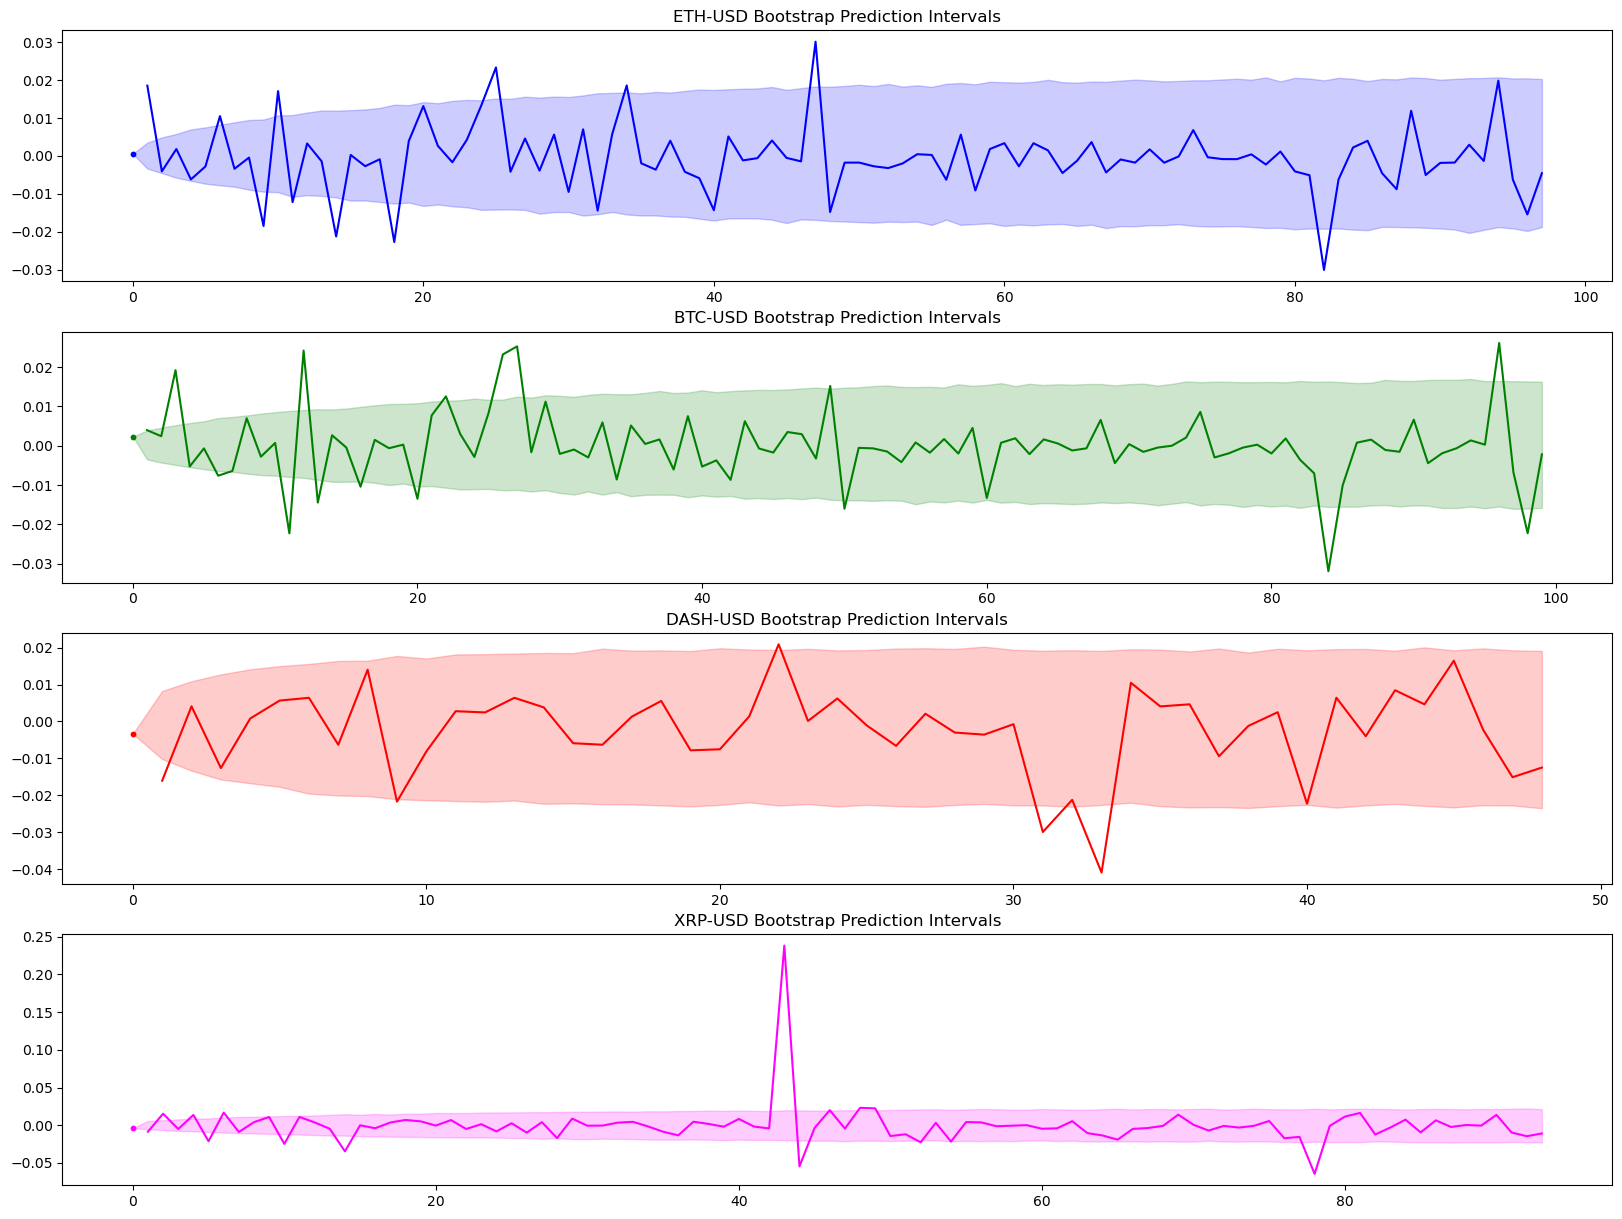

<Figure size 640x480 with 0 Axes>

In [45]:
fig, axs = plt.subplots(nrows = len(cryptoList), ncols = 1, figsize=(20,15))
axsIndex = 0
trajQuantDict : dict[str,tuple[list,list]] = {}

for crypto in cryptoList:
    TRAINING_SET_LEN = trainCryptoDiffDict[crypto].shape[0]
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    
    trajectories = trajectoriesDict[crypto]
    trajectories = np.array(trajectories)
    trajectories = trajectories.T
    trajQuantList_25 = []
    trajQuantList_75 = []
    for i in range(trajectories.shape[0]):
        trajQuant_25 = np.quantile(a = trajectories[i], q = LOW_PERC)
        trajQuant_75 = np.quantile(a = trajectories[i], q = HIGH_PERC)
        trajQuantList_25.append(trajQuant_25)
        trajQuantList_75.append(trajQuant_75)
    trajQuantDict[crypto] = (trajQuantList_25,trajQuantList_75)

    firstPoint = trainCryptoDiffDict[crypto]["Diff"].iloc[TRAINING_SET_LEN - 1]
    axs[axsIndex].plot(np.arange(1, TESTING_SET_LEN + 1, 1), testCryptoDiffDict[crypto]["Diff"], color = colors[axsIndex])
    axs[axsIndex].scatter(x = 0, y = firstPoint, color = colors[axsIndex], sizes = [10])
    axs[axsIndex].fill_between(x = np.arange(0, len(trajQuantList_25), 1), y1 = trajQuantList_25, y2 = trajQuantList_75, alpha = 0.20, color = colors[axsIndex])
    axs[axsIndex].set_title(crypto + " Bootstrap Prediction Intervals")

    axsIndex += 1

plt.show()
plt.clf()
    

In [46]:

inIntervalTable = buildTable("TestingSet captured by interval - Non Parametric Approch", ["Crypto", "% of Points"], ["left", "right"])

for crypto in cryptoList:
    inInterval = 0
    lowTraj = trajQuantDict[crypto][0][1:]
    highTraj = trajQuantDict[crypto][1][1:]
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    for t in range(0, TESTING_SET_LEN):
        if lowTraj[t] <= testCryptoDiffDict[crypto]["Diff"][t] <= highTraj[t]:
            inInterval+=1
    inIntervalTable.add_row(crypto, str((inInterval/TESTING_SET_LEN) * 100))

console = Console()
console.print(inIntervalTable)


TestingSet captured by interval 
    - Non Parametric Approch    
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃       % of Points ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │ 88.65979381443299 │
│ BTC-USD  │ 83.83838383838383 │
│ DASH-USD │ 89.58333333333334 │
│ XRP-USD  │ 83.87096774193549 │
└──────────┴───────────────────┘

### 6.2] Approccio Parametrico

Per l'approccio parametrico abbiamo due ipotesi sulla distribuzione dei residui:
 - Skewed Student, con parametri *gradi di libertà* e *parametro di non centralità*
 - Generalized Logistic, con parametro *c*

Andiamo quindi a vedere quale tra le due, per ogni crypto, cattura meglio i residui del modello GARCH.

                                               Skewed Student Params                                               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃          ┃                    ┃     Non Centrality ┃                   ┃                    ┃          Negative ┃
┃ Crypto   ┃ Degrees Of Freedom ┃              Param ┃              Mean ┃              Scale ┃     Loglikelihood ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │  3.516473494404673 │ 0.033722144524455… │ 0.02062388621608… │ 0.7193371332955668 │ 1207.03475733531… │
│ BTC-USD  │ 3.3064687645793187 │ 0.009557726120843… │ 0.00147848072745… │ 0.6790429283134127 │ 1203.49576520300… │
│ DASH-USD │  3.824098827970277 │                0.0 │ 0.01404492392671… │  0.709022690041867 │  588.797628081744 │
│ XRP-USD  │ 3.3918528112268227 │                0.0 │ -0.0046996569766… │  0.658324631240604 │ 1104.11340489189… │
└──────────┴────────────────────┴────────────────────┴───────────────────┴────────────────────┴───────────────────┘

                                     Generalized Logistic Params                                     
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃            C Param ┃                Mean ┃              Scale ┃ Negative LogLikelihood ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │ 0.7637779420519504 │ 0.23762413558863482 │ 0.4807130762122873 │     1205.3666340245725 │
│ BTC-USD  │ 0.8578133191926725 │ 0.11784578310968241 │ 0.4963510618643525 │     1214.5304615377536 │
│ DASH-USD │ 0.5826316332545343 │ 0.38210941598910697 │ 0.4148984939135314 │      587.7888993819361 │
│ XRP-USD  │ 0.8396765179300889 │ 0.11485328042880677 │ 0.4703879989799512 │     1121.7298020281225 │
└──────────┴────────────────────┴─────────────────────┴────────────────────┴────────────────────────┘

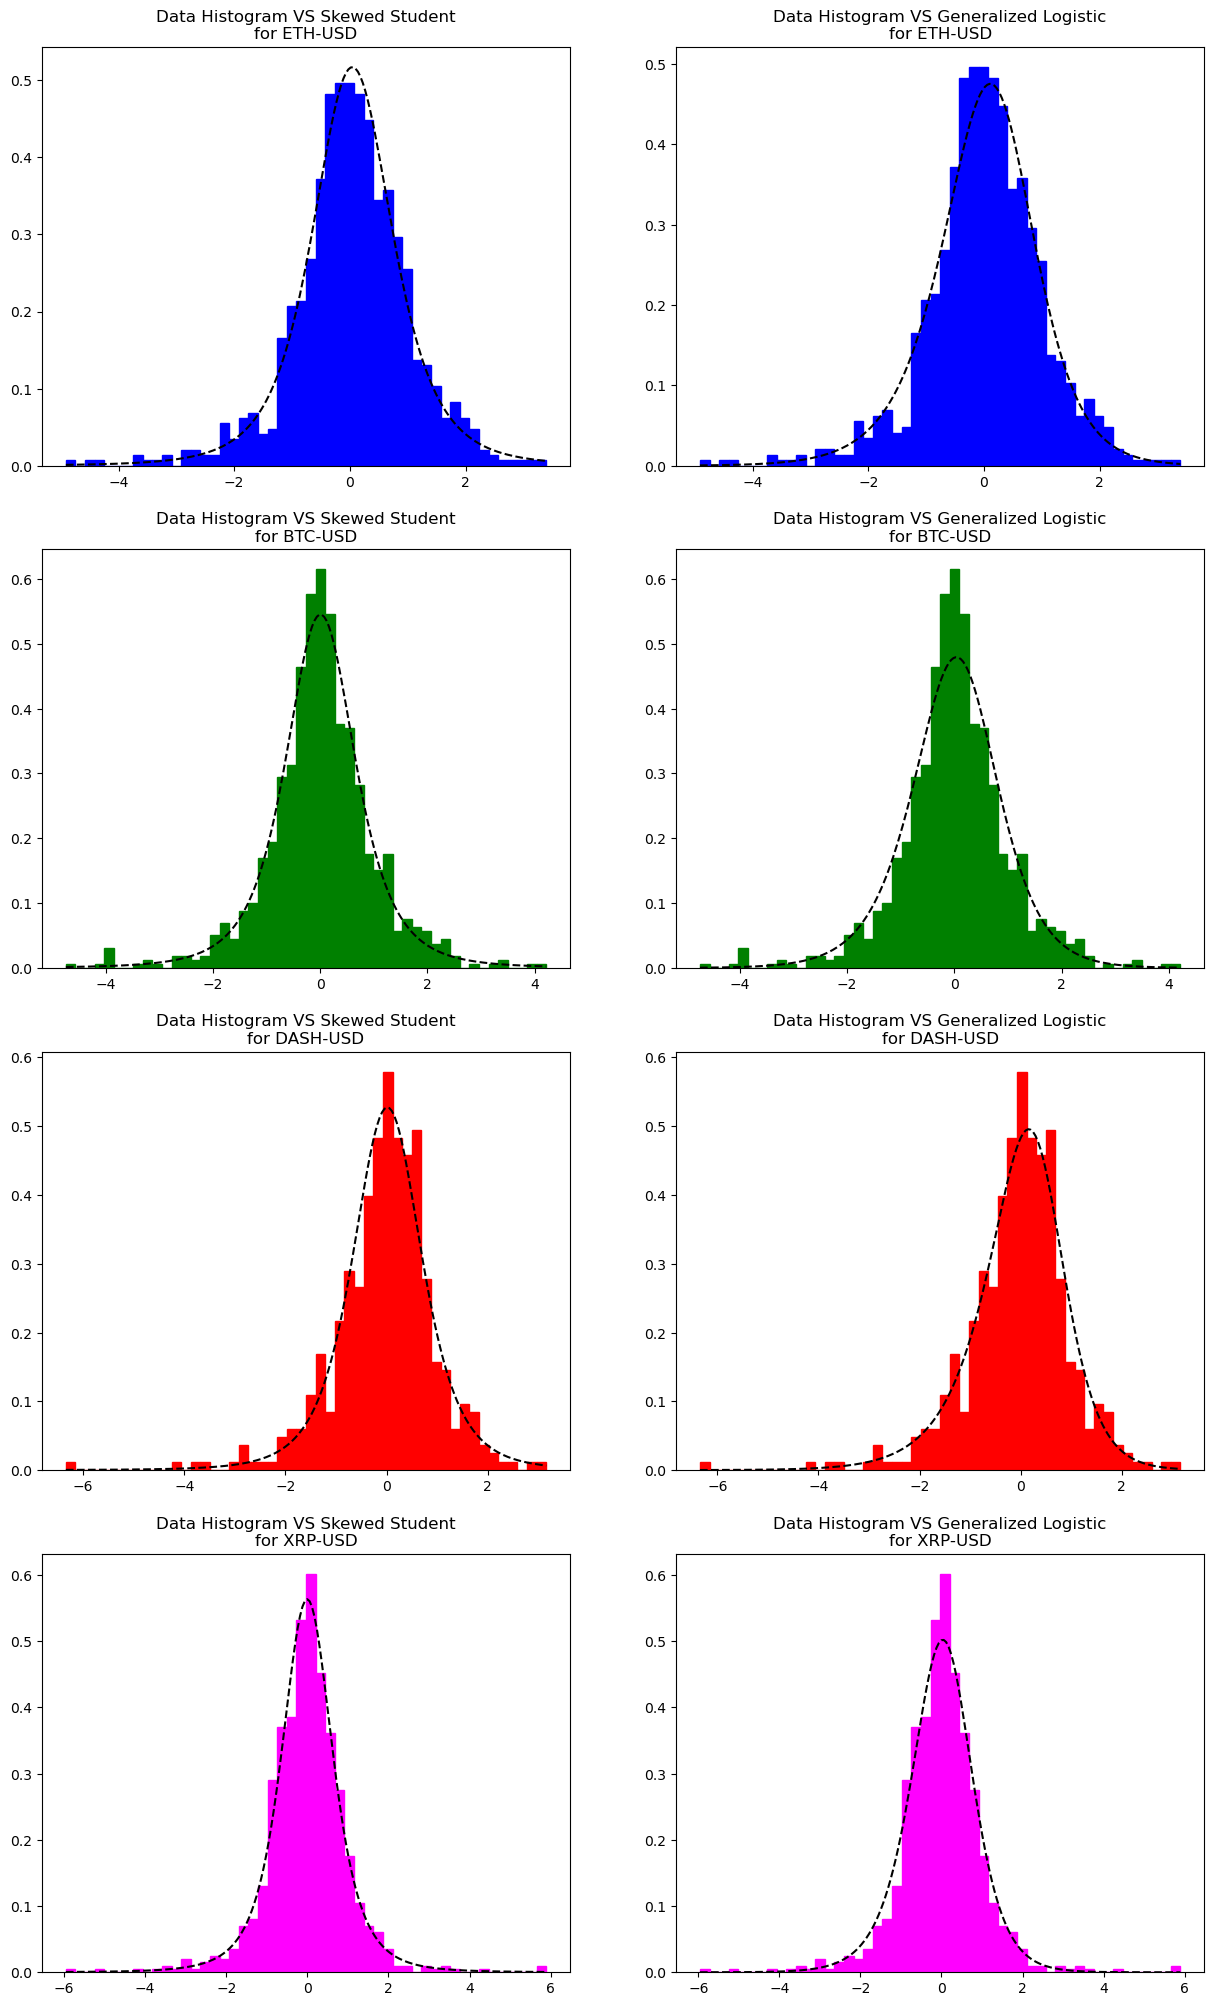

<Figure size 640x480 with 0 Axes>

In [47]:
np.random.seed(seed=NP_RANDOM_SEED)

figure, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 25))
skewedStudentparamsDict : dict[str, tuple[float, float, float, float]] = {}
genLogisticParamsDict : dict[str, tuple[float, float, float, float]] = {}

axsIndex = 0
for crypto in cryptoList :
    RESIDUALS_LEN = residualsDict[crypto]["Resid"].shape[0]
    fitResults = fit(nct, residualsDict[crypto]["Resid"], bounds=[(0, 30), (0, 30), (-30, 30), (0, 30)])
    skewedStudentparamsDict[crypto] = (fitResults.params[0], fitResults.params[1], fitResults.params[2], fitResults.params[3], fitResults.nllf())
    
    fitResults.plot(ax = axs[axsIndex][0])
    axs[axsIndex][0].set_title("Data Histogram VS Skewed Student\nfor " + crypto)
    axs[axsIndex][0].set_xlabel("")
    axs[axsIndex][0].set_ylabel("")
    axs[axsIndex][0].get_legend().remove()
    axs[axsIndex][0].properties()['children'][0].set_color("black")   
    for elem in axs[axsIndex][0].properties()['children'][1:-2] :
        if type(elem) == matplotlib.patches.Rectangle:
            elem.set_color(colors[axsIndex])      
    axsIndex += 1

axsIndex = 0
for crypto in cryptoList :
    RESIDUALS_LEN = residualsDict[crypto]["Resid"].shape[0]
    fitResults = fit(genlogistic, residualsDict[crypto]["Resid"], bounds=[(0, 30), (-30, 30), (0, 30)])
    genLogisticParamsDict[crypto] = (fitResults.params[0], fitResults.params[1], fitResults.params[2] , fitResults.nllf())

    fitResults.plot(ax = axs[axsIndex][1])
    axs[axsIndex][1].set_title("Data Histogram VS Generalized Logistic\nfor " + crypto)
    axs[axsIndex][1].set_xlabel("")
    axs[axsIndex][1].set_ylabel("")
    axs[axsIndex][1].get_legend().remove()
    axs[axsIndex][1].properties()['children'][0].set_color("black")   
    for elem in axs[axsIndex][1].properties()['children'][1:-2] : 
        if type(elem) == matplotlib.patches.Rectangle:
            elem.set_color(colors[axsIndex])   
    axsIndex += 1

paramsSkewedTable = buildTable("Skewed Student Params", ["Crypto", "Degrees Of Freedom", "Non Centrality Param", "Mean", "Scale", "Negative Loglikelihood"], ["left", "right", "right",  "right", "right", "right"])
for crypto in cryptoList :
    paramsSkewedTable.add_row(crypto, str(skewedStudentparamsDict[crypto][0]), str(skewedStudentparamsDict[crypto][1]), str(skewedStudentparamsDict[crypto][2]), str(skewedStudentparamsDict[crypto][3]), str(skewedStudentparamsDict[crypto][4]))

paramsLogisticTable = buildTable("Generalized Logistic Params", ["Crypto", "C Param", "Mean", "Scale", "Negative LogLikelihood"], ["left", "right",  "right", "right", "right"])
for crypto in cryptoList :
    paramsLogisticTable.add_row(crypto, str(genLogisticParamsDict[crypto][0]), str(genLogisticParamsDict[crypto][1]), str(genLogisticParamsDict[crypto][2]), str(genLogisticParamsDict[crypto][3]))

console = Console()
console.print(paramsSkewedTable)
console.print(paramsLogisticTable)

plt.show()
plt.clf()

Per decidere la distribuzione più adatta ricordiamo che la minimizzazione della *Negative Log-Likelihood* è un *problema proxy* per il problema di massimizzazione della *Maximum Likelihood*".
Procediamo quindi a selezionare la distribuzione che restituisce il valore minimo di *Negative Log-Likelihood*".

In [48]:

bestDistrTable = buildTable("Best Guessed Distribution for crypto", ["Crypto", "Student Neg Log-Likelihood", "Logistic Neg Log-Likelihood","Chosen Distribution"], ["left", "right", "right", "right"])
for crypto in cryptoList:
    if genLogisticParamsDict[crypto][3] > skewedStudentparamsDict[crypto][4]:
        bestDistrTable.add_row(crypto, str(skewedStudentparamsDict[crypto][4]), str(genLogisticParamsDict[crypto][3]), "Skewed Student")
    else:
        bestDistrTable.add_row(crypto, str(skewedStudentparamsDict[crypto][4]), str(genLogisticParamsDict[crypto][3]), "Generalized Logistic")
Console().print(bestDistrTable)

                             Best Guessed Distribution for crypto                             
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃ Student Neg Log-Likelihood ┃ Logistic Neg Log-Likelihood ┃  Chosen Distribution ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │         1207.0347573353117 │          1205.3666340245725 │ Generalized Logistic │
│ BTC-USD  │         1203.4957652030082 │          1214.5304615377536 │       Skewed Student │
│ DASH-USD │           588.797628081744 │           587.7888993819361 │ Generalized Logistic │
│ XRP-USD  │         1104.1134048918952 │          1121.7298020281225 │       Skewed Student │
└──────────┴────────────────────────────┴─────────────────────────────┴──────────────────────┘

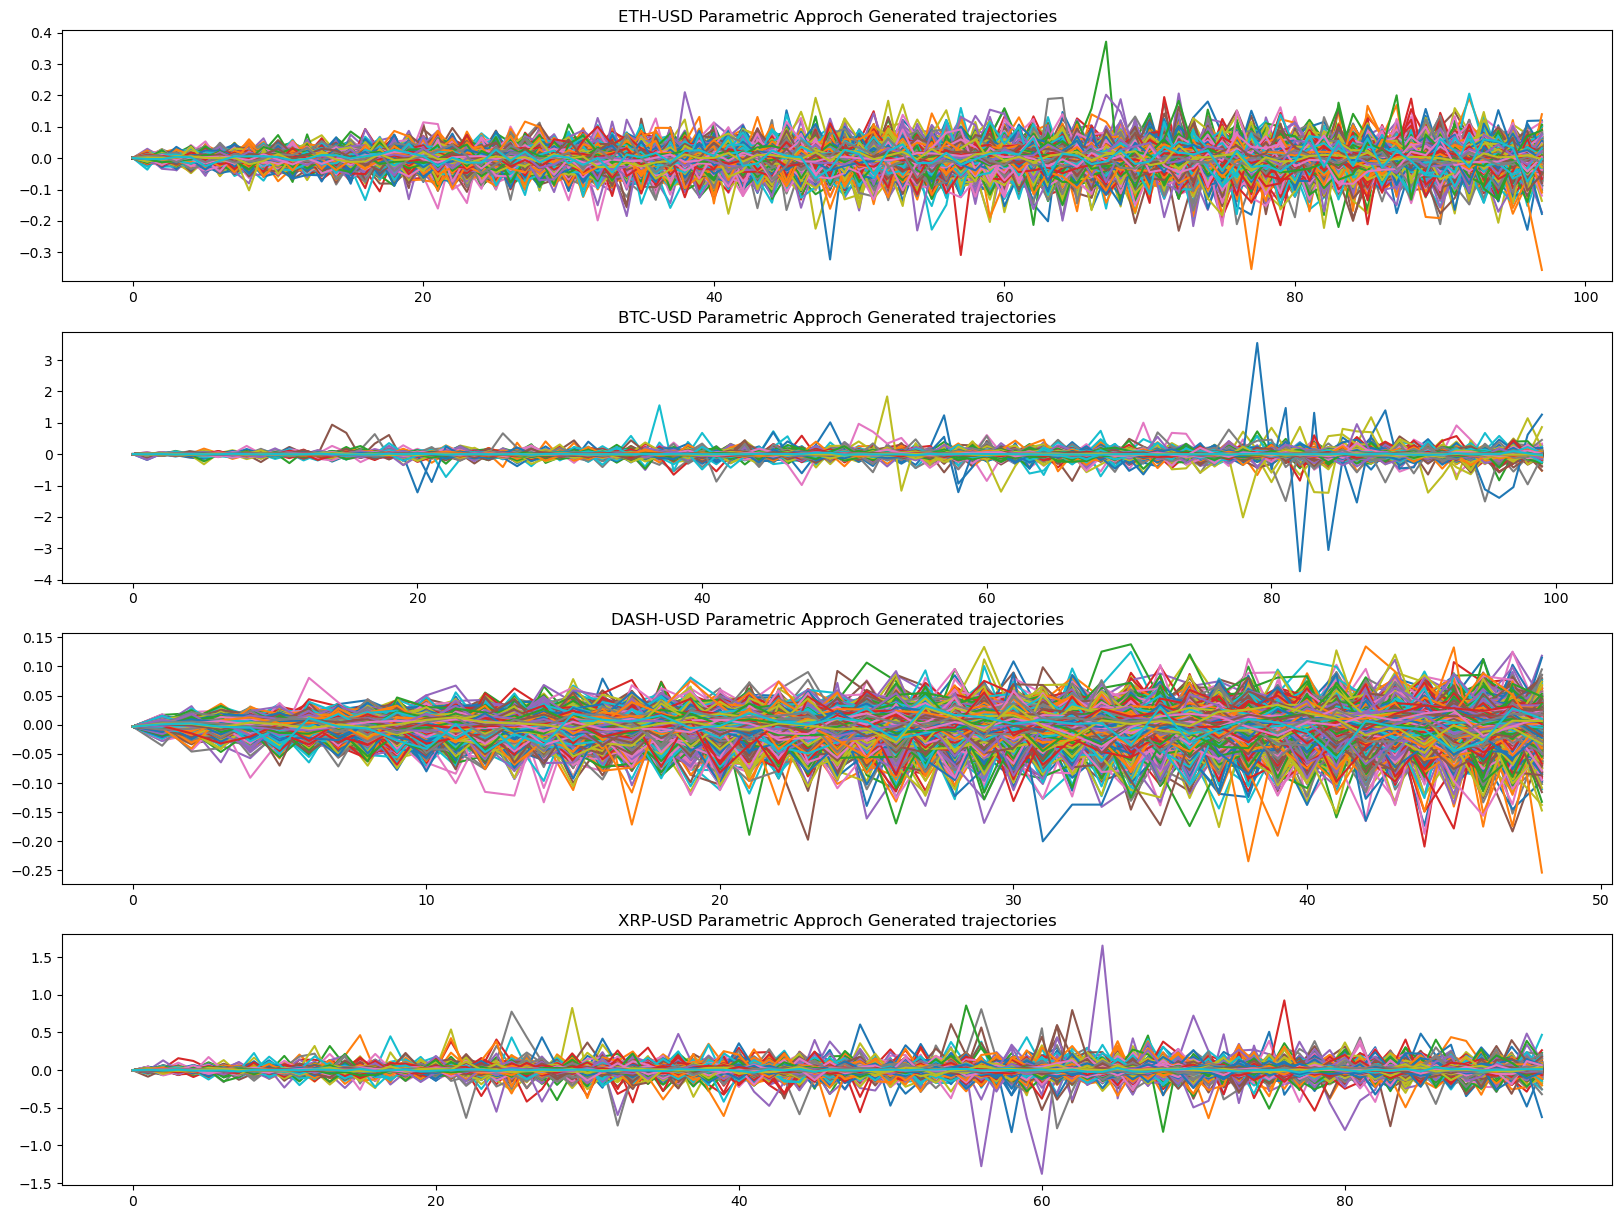

<Figure size 640x480 with 0 Axes>

In [49]:
NUM_SAMPLES = 10000
fig, axs = plt.subplots(nrows = len(cryptoList), ncols = 1, figsize=(20,15))
axsIndex = 0
np.random.seed(NP_RANDOM_SEED)
paramTrajectoriesDict : dict[str, list[list]] = {}


for crypto in cryptoList:
    TRAINING_SET_LEN = trainCryptoDiffDict[crypto].shape[0]
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    trajectories = []
    for _ in range(NUM_SAMPLES):
        computedXt = []
        if genLogisticParamsDict[crypto][3] > skewedStudentparamsDict[crypto][4]:
            degreesOfFreedom = skewedStudentparamsDict[crypto][0]
            nonCentralityParam = skewedStudentparamsDict[crypto][1]
            loc = skewedStudentparamsDict[crypto][2]
            scale = skewedStudentparamsDict[crypto][3]
            residuals = nct.rvs(degreesOfFreedom, nonCentralityParam, size = TESTING_SET_LEN, loc = loc, scale = scale)
        else:
            cParam = genLogisticParamsDict[crypto][0]
            loc = genLogisticParamsDict[crypto][1]
            scale = genLogisticParamsDict[crypto][2]
            residuals = genlogistic.rvs(cParam, size = TESTING_SET_LEN, loc = loc, scale = scale)
        prev_Xt = trainCryptoDiffDict[crypto]["Diff"].iloc[TRAINING_SET_LEN-1]
        computedXt.append(prev_Xt)
        prev_var_t = sigma_0**2
        for i in range(TESTING_SET_LEN):
            var_t = alpha_0 + (alpha_1 * (prev_Xt**2)) + (beta_1 * prev_var_t)
            Xt = np.sqrt(var_t) * residuals[i]
            computedXt.append(Xt)
            prev_Xt = Xt
            prev_var_t = var_t
        trajectories.append(computedXt)
    paramTrajectoriesDict[crypto] = trajectories

    axs[axsIndex].set_title(crypto + " Parametric Approch Generated trajectories")
    for traj in trajectories:
        axs[axsIndex].plot(traj)
    axsIndex += 1

plt.show()
plt.clf()

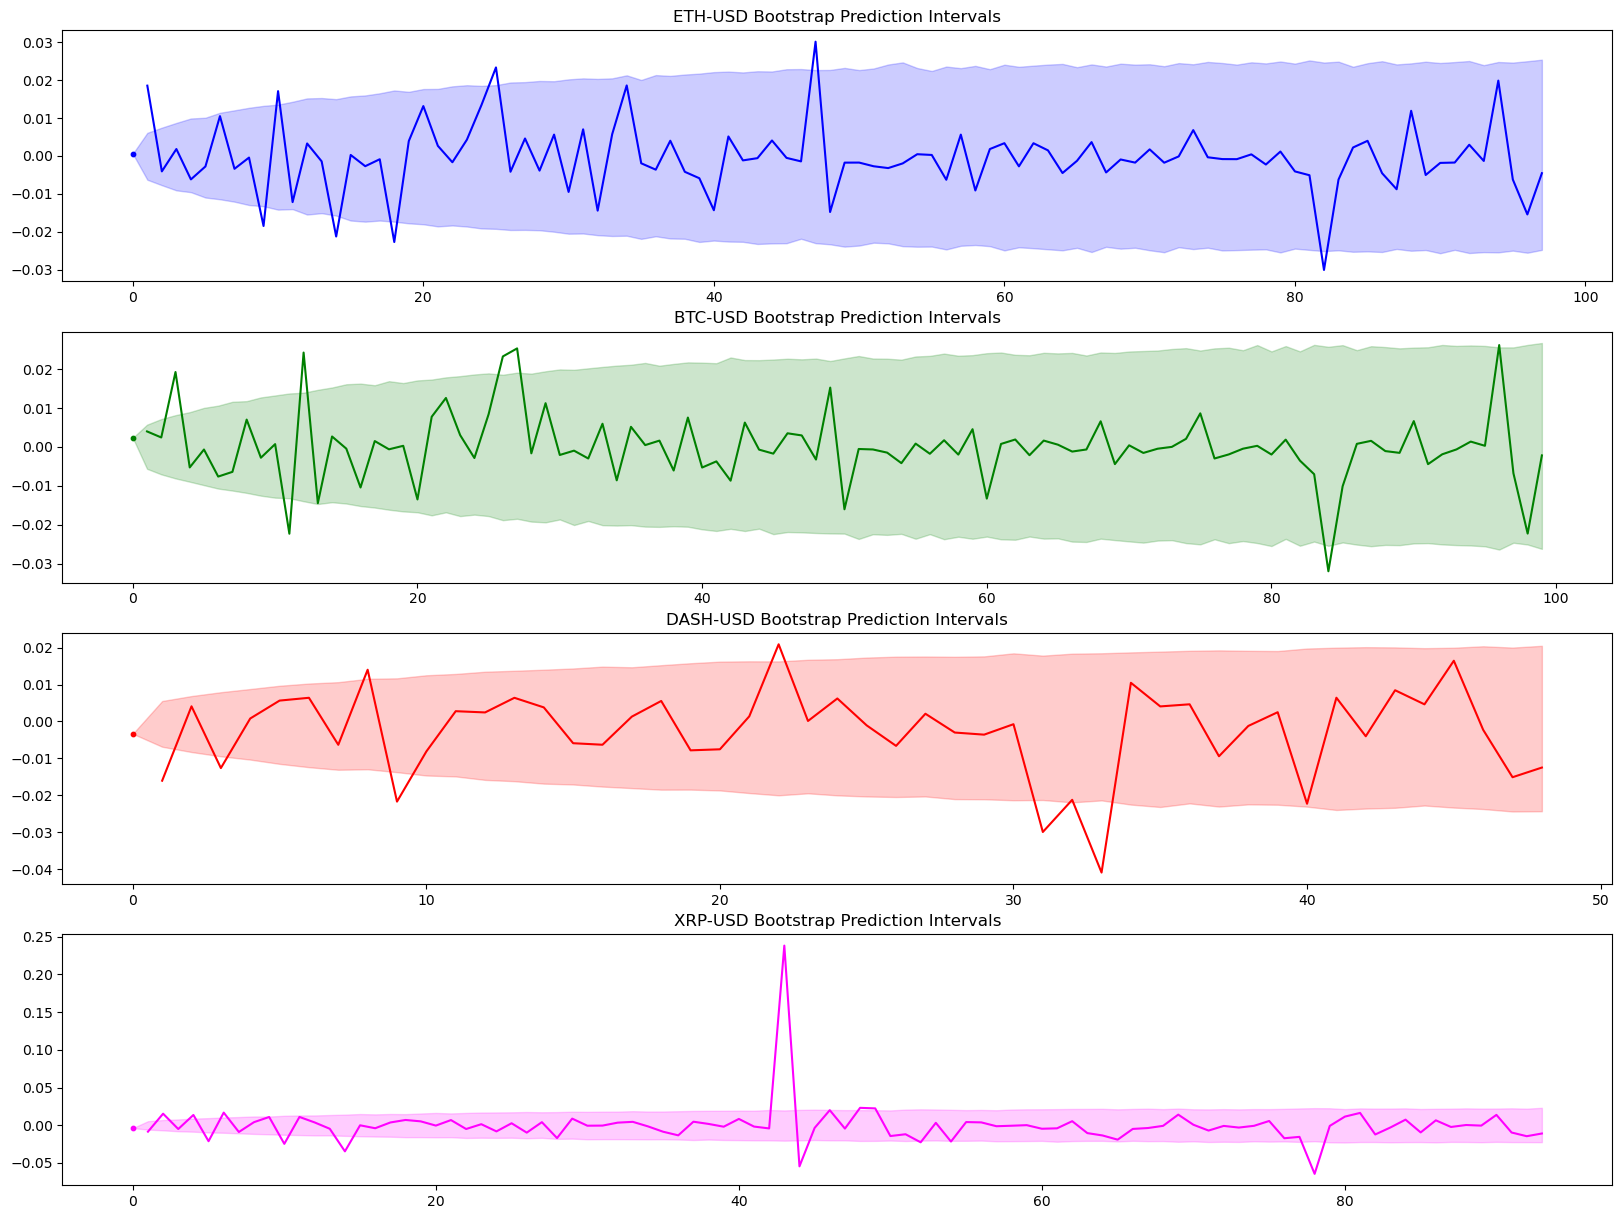

<Figure size 640x480 with 0 Axes>

In [50]:
fig, axs = plt.subplots(nrows = len(cryptoList), ncols = 1, figsize=(20,15))
axsIndex = 0
paramTrajQuantDict : dict[str,tuple[list,list]] = {}

for crypto in cryptoList:
    TRAINING_SET_LEN = trainCryptoDiffDict[crypto].shape[0]
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    
    trajectories = paramTrajectoriesDict[crypto]
    trajectories = np.array(trajectories)
    trajectories = trajectories.T
    trajQuantList_25 = []
    trajQuantList_75 = []
    for i in range(trajectories.shape[0]):
        trajQuant_25 = np.quantile(a = trajectories[i], q = LOW_PERC)
        trajQuant_75 = np.quantile(a = trajectories[i], q = HIGH_PERC)
        trajQuantList_25.append(trajQuant_25)
        trajQuantList_75.append(trajQuant_75)
    paramTrajQuantDict[crypto] = (trajQuantList_25,trajQuantList_75)

    firstPoint = trainCryptoDiffDict[crypto]["Diff"].iloc[TRAINING_SET_LEN - 1]
    axs[axsIndex].plot(np.arange(1, TESTING_SET_LEN + 1, 1), testCryptoDiffDict[crypto]["Diff"], color = colors[axsIndex])
    axs[axsIndex].scatter(x = 0, y = firstPoint, color = colors[axsIndex], sizes = [10])
    axs[axsIndex].fill_between(x = np.arange(0, len(trajQuantList_25), 1), y1 = trajQuantList_25, y2 = trajQuantList_75, alpha = 0.20, color = colors[axsIndex])
    axs[axsIndex].set_title(crypto + " Bootstrap Prediction Intervals")

    axsIndex += 1

plt.show()
plt.clf()

In [51]:
inIntervalTable = buildTable("TestingSet captured by interval - Parametric Approch", ["Crypto", "% of Points"], ["left", "right"])

for crypto in cryptoList:
    inInterval = 0
    lowTraj = paramTrajQuantDict[crypto][0][1:]
    highTraj = paramTrajQuantDict[crypto][1][1:]
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    for t in range(0, TESTING_SET_LEN):
        if lowTraj[t] <= testCryptoDiffDict[crypto]["Diff"][t] <= highTraj[t]:
            inInterval+=1
    inIntervalTable.add_row(crypto, str((inInterval/TESTING_SET_LEN) * 100))

console = Console()
console.print(inIntervalTable)

TestingSet captured by interval 
      - Parametric Approch      
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃       % of Points ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │ 91.75257731958763 │
│ BTC-USD  │ 92.92929292929293 │
│ DASH-USD │ 85.41666666666666 │
│ XRP-USD  │ 84.94623655913979 │
└──────────┴───────────────────┘

In [52]:
inIntervalTable = buildTable("TestingSet captured by interval - Comparison", ["Crypto", "% of Points - Param", "% of Points - Non Param"], ["left", "right", "right"])

for crypto in cryptoList:
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    paramInInterval = 0
    nonParamInInterval = 0
    lowTraj = paramTrajQuantDict[crypto][0][1:]
    highTraj = paramTrajQuantDict[crypto][1][1:]
    
    for t in range(0, TESTING_SET_LEN):
        if lowTraj[t] <= testCryptoDiffDict[crypto]["Diff"][t] <= highTraj[t]:
            paramInInterval+=1
    
    lowTraj = trajQuantDict[crypto][0][1:]
    highTraj = trajQuantDict[crypto][1][1:]
    for t in range(0, TESTING_SET_LEN):
        if lowTraj[t] <= testCryptoDiffDict[crypto]["Diff"][t] <= highTraj[t]:
            nonParamInInterval+=1
    inIntervalTable.add_row(crypto, str((paramInInterval/TESTING_SET_LEN) * 100), str((nonParamInInterval/TESTING_SET_LEN) * 100))

console = Console()
console.print(inIntervalTable)

        TestingSet captured by interval - Comparison        
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃ % of Points - Param ┃ % of Points - Non Param ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │   91.75257731958763 │       88.65979381443299 │
│ BTC-USD  │   92.92929292929293 │       83.83838383838383 │
│ DASH-USD │   85.41666666666666 │       89.58333333333334 │
│ XRP-USD  │   84.94623655913979 │       83.87096774193549 │
└──────────┴─────────────────────┴─────────────────────────┘